# <h1><font color=orange>Outline</font></h1>
<ol type="I">
<li>

[GitHub code](#scrollTo=lB-7W2LWSIvn&line=1&uniqifier=1)</li>
<li>Data</li>
<li>BERT model(s)</li>
</ol>

II. GitHub code

III. Data

IV. BERT model(s)

In [1]:
import torch

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(torch.cuda.is_available())

True


In [2]:
PATH = "Thesis/Embeddings"
!ls $PATH

de  en	es  fr	nl  ro


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from mapping_methods import *
import keras

settings_nnca = [
    {
        "neurons": [500],
        "activation_function": "elu",
        "max_epochs": 250,
        "dropout": 0.0,
        "loss_function": "Huber",
        "learning_rate": 5e-4
    }
]

settings = settings_nnca[0]

def evaluate_method_transformer(sl, tl, model_name, size, method, dims, evaluation_function):
    sl_vec = np.load(PATH + "/" + f"{sl}/" + f"emb_{model_name}_{sl}.npy",mmap_mode="r")
    tl_vec = np.load(PATH + "/" + f"{tl}/" + f"emb_{model_name}_{tl}.npy",mmap_mode="r")

    sl_vec = torch.as_tensor(sl_vec).to(device)
    tl_vec = torch.as_tensor(tl_vec).to(device)

    print(f"SL data shape: {np.shape(sl_vec)} | TL data shape: {np.shape(tl_vec)}")

    sl_train, sl_test, tl_train, tl_test = train_test_split(sl_vec[:size], tl_vec[:size], test_size=0.25, random_state=42)

    print(f"Model: {model_name} | Training data shape: {np.shape(sl_train)} | Testing data shape: {np.shape(sl_test)}")

    if method == nnca:
        score = method(sl_train, sl_test, tl_train, tl_test, dims, settings, evaluation_function, is_plotting=False)
    else:    
        score = method(sl_train, sl_test, tl_train, tl_test, dims, evaluation_function)

    return score

2023-06-09 11:06:53.068006: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
def evaluate_method(sl, tl, model_name, size, method, dims, evaluation_function):
    score = []
    
    if model_name == "doc2vec":
        score = evaluate_method_doc2vec(sl, tl, model_name, size, method, dims, evaluation_function)
    else: # all transformer models
        score = evaluate_method_transformer(sl, tl, model_name, size, method, dims, evaluation_function)
        
    clear_memory()
        
    return score

In [5]:
from itertools import permutations

# languages = ["en", "ro", "es", "fr", "de", "nl"]
languages = ["en", "ro", "fr", "de", "nl"]

language_pairs = list(permutations(languages,2))

models = ["bert-base-multilingual-uncased", "mt5-base", "xlm-roberta-base", "ernie-m-base_pytorch"]
# models = models[:2]
# models = ["doc2vec"]

size = 5000

dims = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 768]
# dims = list(range(1,768))
# dims = [250, 450, 768]

mappings = [lca, lcc, nnca]

evaluation_functions = [mate_retrieval, reciprocal_rank]
# evaluation_functions = [reciprocal_rank]

mkdir: cannot create directory ‘Thesis/Plots’: File exists
mkdir: cannot create directory ‘Thesis/Results’: File exists
mkdir: cannot create directory ‘Thesis/Plots/mate_retrieval’: File exists
mkdir: cannot create directory ‘Thesis/Results/mate_retrieval’: File exists
mkdir: cannot create directory ‘Thesis/Plots/mate_retrieval/en-ro/’: File exists
en-ro already present - moving to next language pair
mkdir: cannot create directory ‘Thesis/Plots/mate_retrieval/en-fr/’: File exists
en-fr already present - moving to next language pair
mkdir: cannot create directory ‘Thesis/Plots/mate_retrieval/en-de/’: File exists
en-de already present - moving to next language pair
mkdir: cannot create directory ‘Thesis/Plots/mate_retrieval/en-nl/’: File exists
en-nl already present - moving to next language pair
mkdir: cannot create directory ‘Thesis/Plots/mate_retrieval/ro-en/’: File exists
ro-en already present - moving to next language pair
mkdir: cannot create directory ‘Thesis/Plots/mate_retrieval/

100%|██████████| 15/15 [00:03<00:00,  4.80it/s]


[0.9775999784469604, 0.121799997985363] [400, 400]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  338578 KB |    4778 MB |    4676 MB |
|       from large pool |  104378 KB |  336077 KB |    4484 MB |    4382 MB |
|       from small pool |       0 KB |    3557 KB |     294 MB |     294 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  338578 KB |    4778 MB |    4676 MB |
|       from 

100%|██████████| 15/15 [00:02<00:00,  6.50it/s]


[0.9503999948501587, 0.30979999899864197] [550, 750]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  340616 KB |    7344 MB |    7242 MB |
|       from large pool |  104378 KB |  338115 KB |    6893 MB |    6792 MB |
|       from small pool |       0 KB |    3557 KB |     450 MB |     450 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  340616 KB |    7344 MB |    7242 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


[0.9695999622344971, 0.039799999445676804] [700, 650]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  340616 KB |    9910 MB |    9808 MB |
|       from large pool |  104378 KB |  338115 KB |    9303 MB |    9201 MB |
|       from small pool |       0 KB |    3557 KB |     607 MB |     607 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  340616 KB |    9910 MB |    9808 MB |
|       fr

100%|██████████| 15/15 [00:02<00:00,  6.52it/s]


[0.9871999621391296, 0.4851999878883362] [550, 650]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  340616 KB |   12476 MB |   12374 MB |
|       from large pool |  104378 KB |  338115 KB |   11712 MB |   11611 MB |
|       from small pool |       0 KB |    3557 KB |     763 MB |     763 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  340616 KB |   12476 MB |   12374 MB |
|       from

<Figure size 640x480 with 0 Axes>

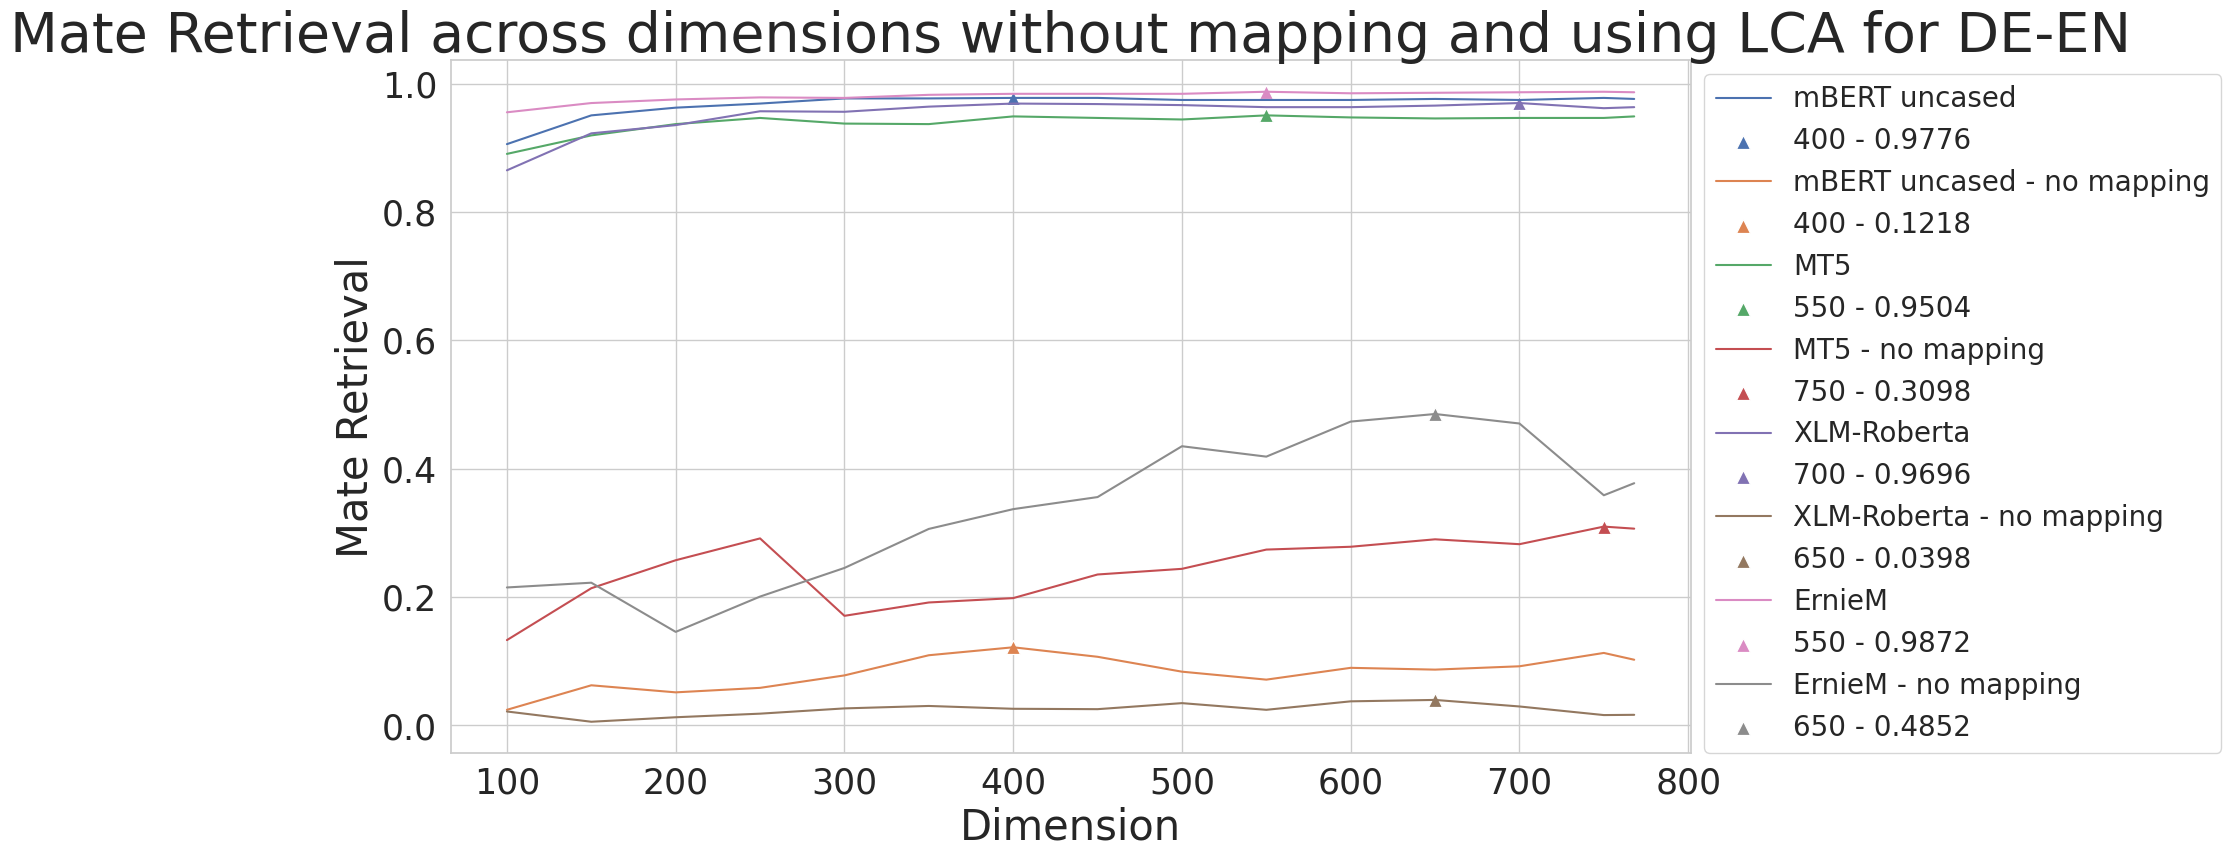

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [05:43<00:00, 22.92s/it]


[0.9807999730110168, 0.121799997985363] [500, 400]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   17797 MB |   17695 MB |
|       from large pool |  104378 KB |  420439 KB |   16883 MB |   16781 MB |
|       from small pool |       0 KB |    5432 KB |     914 MB |     914 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   17797 MB |   17695 MB |
|       from 

100%|██████████| 15/15 [05:37<00:00, 22.49s/it]


[0.9399999976158142, 0.30979999899864197] [550, 750]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   23118 MB |   23016 MB |
|       from large pool |  104378 KB |  420439 KB |   22053 MB |   21951 MB |
|       from small pool |       0 KB |    5432 KB |    1064 MB |    1064 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   23118 MB |   23016 MB |
|       fro

100%|██████████| 15/15 [05:33<00:00, 22.24s/it]


[0.974399983882904, 0.039799999445676804] [700, 650]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   28439 MB |   28337 MB |
|       from large pool |  104378 KB |  420439 KB |   27223 MB |   27121 MB |
|       from small pool |       0 KB |    5432 KB |    1215 MB |    1215 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   28439 MB |   28337 MB |
|       fro

100%|██████████| 15/15 [05:36<00:00, 22.42s/it]


[0.9839999675750732, 0.4851999878883362] [400, 650]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   33760 MB |   33658 MB |
|       from large pool |  104378 KB |  420439 KB |   32393 MB |   32292 MB |
|       from small pool |       0 KB |    5432 KB |    1366 MB |    1366 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   33760 MB |   33658 MB |
|       from

<Figure size 640x480 with 0 Axes>

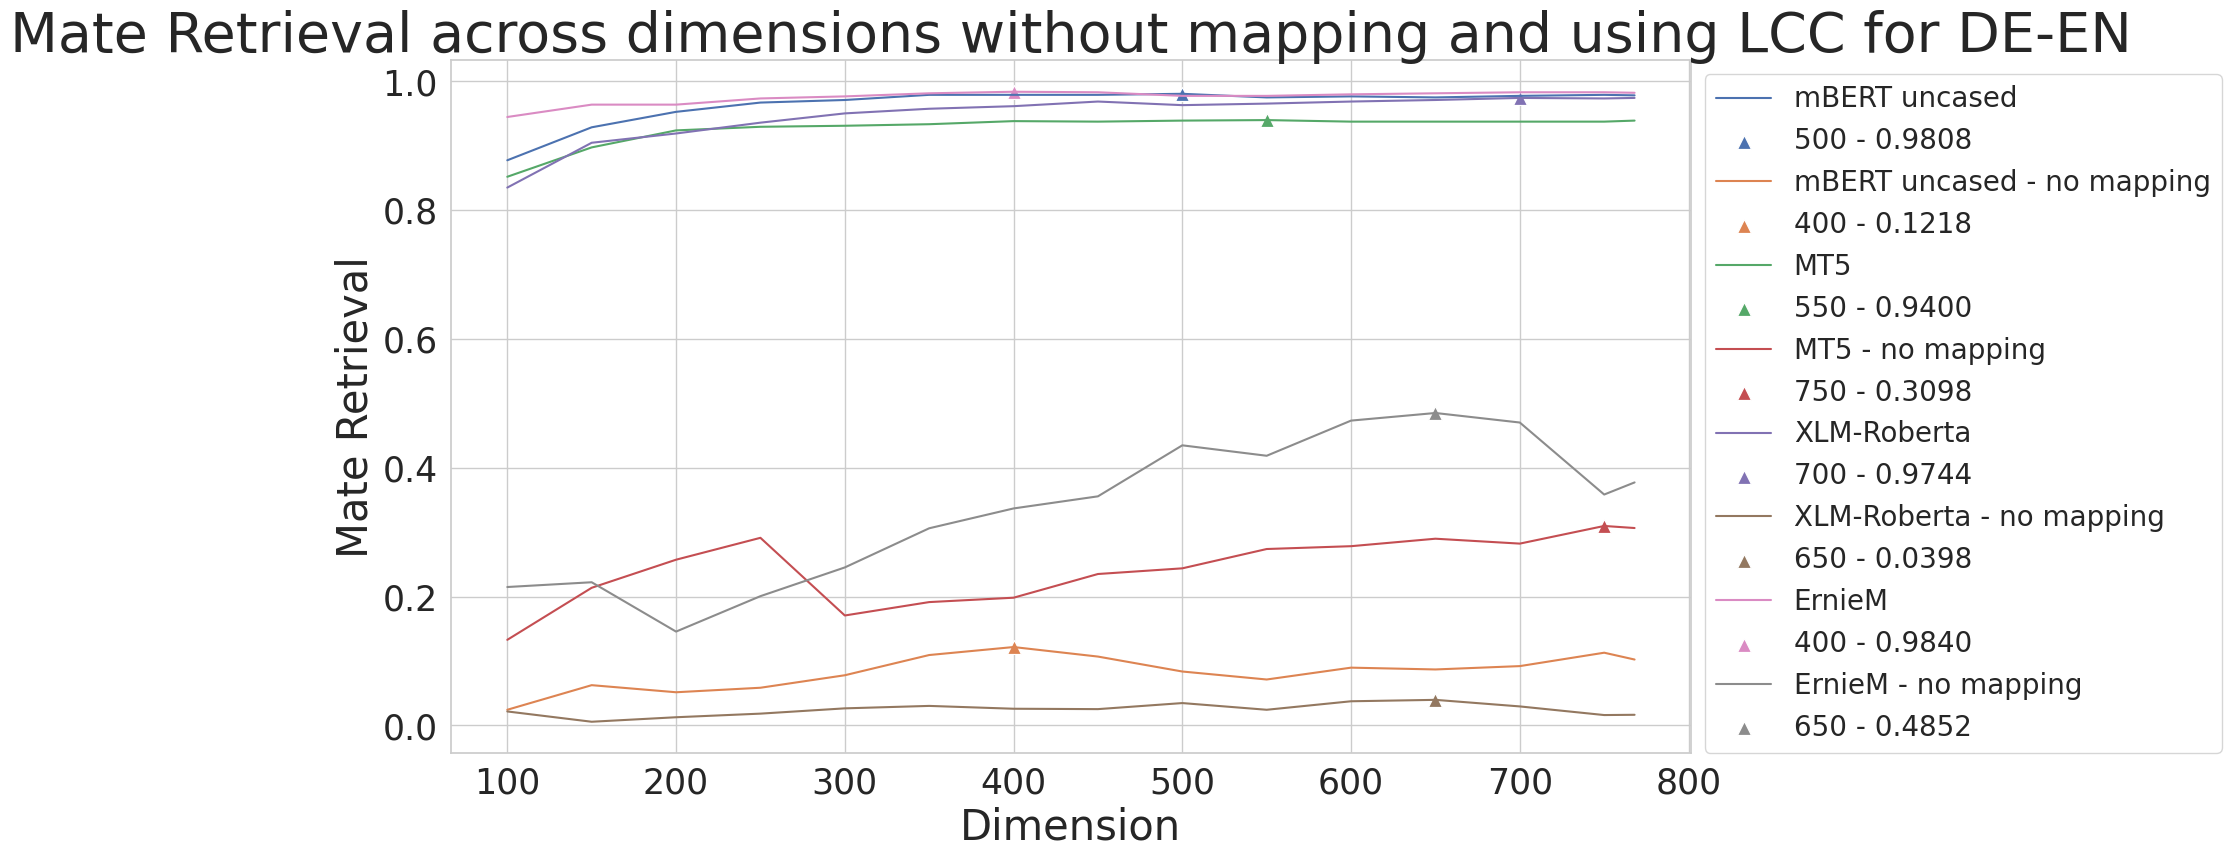

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

2023-06-09 11:33:45.002731: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 37278 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:17:00.0, compute capability: 8.0
2023-06-09 11:33:46.028407: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-09 11:33:46.242125: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x8458b010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-09 11:33:46.242187: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2023-06-09 11:33:46.260167: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-09 11:33:46.473818: I

40/40 [==============================] - 0s 3ms/step
100 - 0.31919997930526733 - 0.024399999529123306
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               75500     
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               75150     
                                                                 
Total params: 150,650
Trainable params: 150,650
Non-trainable params: 0
_________________

                                                                 
 dense_15 (Dense)            (None, 450)               225450    
                                                                 
Total params: 450,950
Trainable params: 450,950
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
450 - 0.8455999493598938 - 0.10700000077486038
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 500)]             0         
                                                                 
 dropout_16 (Dropout)        (None, 500)               0         
                                                                 
 dense_16 (Dense)            (None, 500)               250500    
                                                                 
 dropout_17 (Dropo

                                                                 
 dropout_28 (Dropout)        (None, 768)               0         
                                                                 
 dense_28 (Dense)            (None, 500)               384500    
                                                                 
 dropout_29 (Dropout)        (None, 500)               0         
                                                                 
 dense_29 (Dense)            (None, 768)               384768    
                                                                 
Total params: 769,268
Trainable params: 769,268
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
768 - 0.8751999735832214 - 0.10239999741315842
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|-----------

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250)]             0         
                                                                 
 dropout_6 (Dropout)         (None, 250)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               125500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_7 (Dense)             (None, 250)               125250    
                                                                 
Total params: 250,750
Trainable params: 250,750
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
250 - 0.623199999

Total params: 551,050
Trainable params: 551,050
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
550 - 0.8407999873161316 - 0.27399998903274536
Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 600)]             0         
                                                                 
 dropout_20 (Dropout)        (None, 600)               0         
                                                                 
 dense_20 (Dense)            (None, 500)               300500    
                                                                 
 dropout_21 (Dropout)        (None, 500)               0         
                                                                 
 dense_21 (Dense)            (None, 600)               300600    
                  

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 100,600
Trainable params: 100,600
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
100 - 0.159999996

                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.4887999892234802 - 0.025999998673796654
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense)

                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.2263999879360199 - 0.016200000420212746
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_28 (Drop

 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
200 - 0.6575999855995178 - 0.14579999446868896
Model: "model_9"
_________________________________________________________________
 Layer (type)      

Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.8823999762535095 - 0.4350000023841858
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 550)               275550    
                                         

<Figure size 640x480 with 0 Axes>

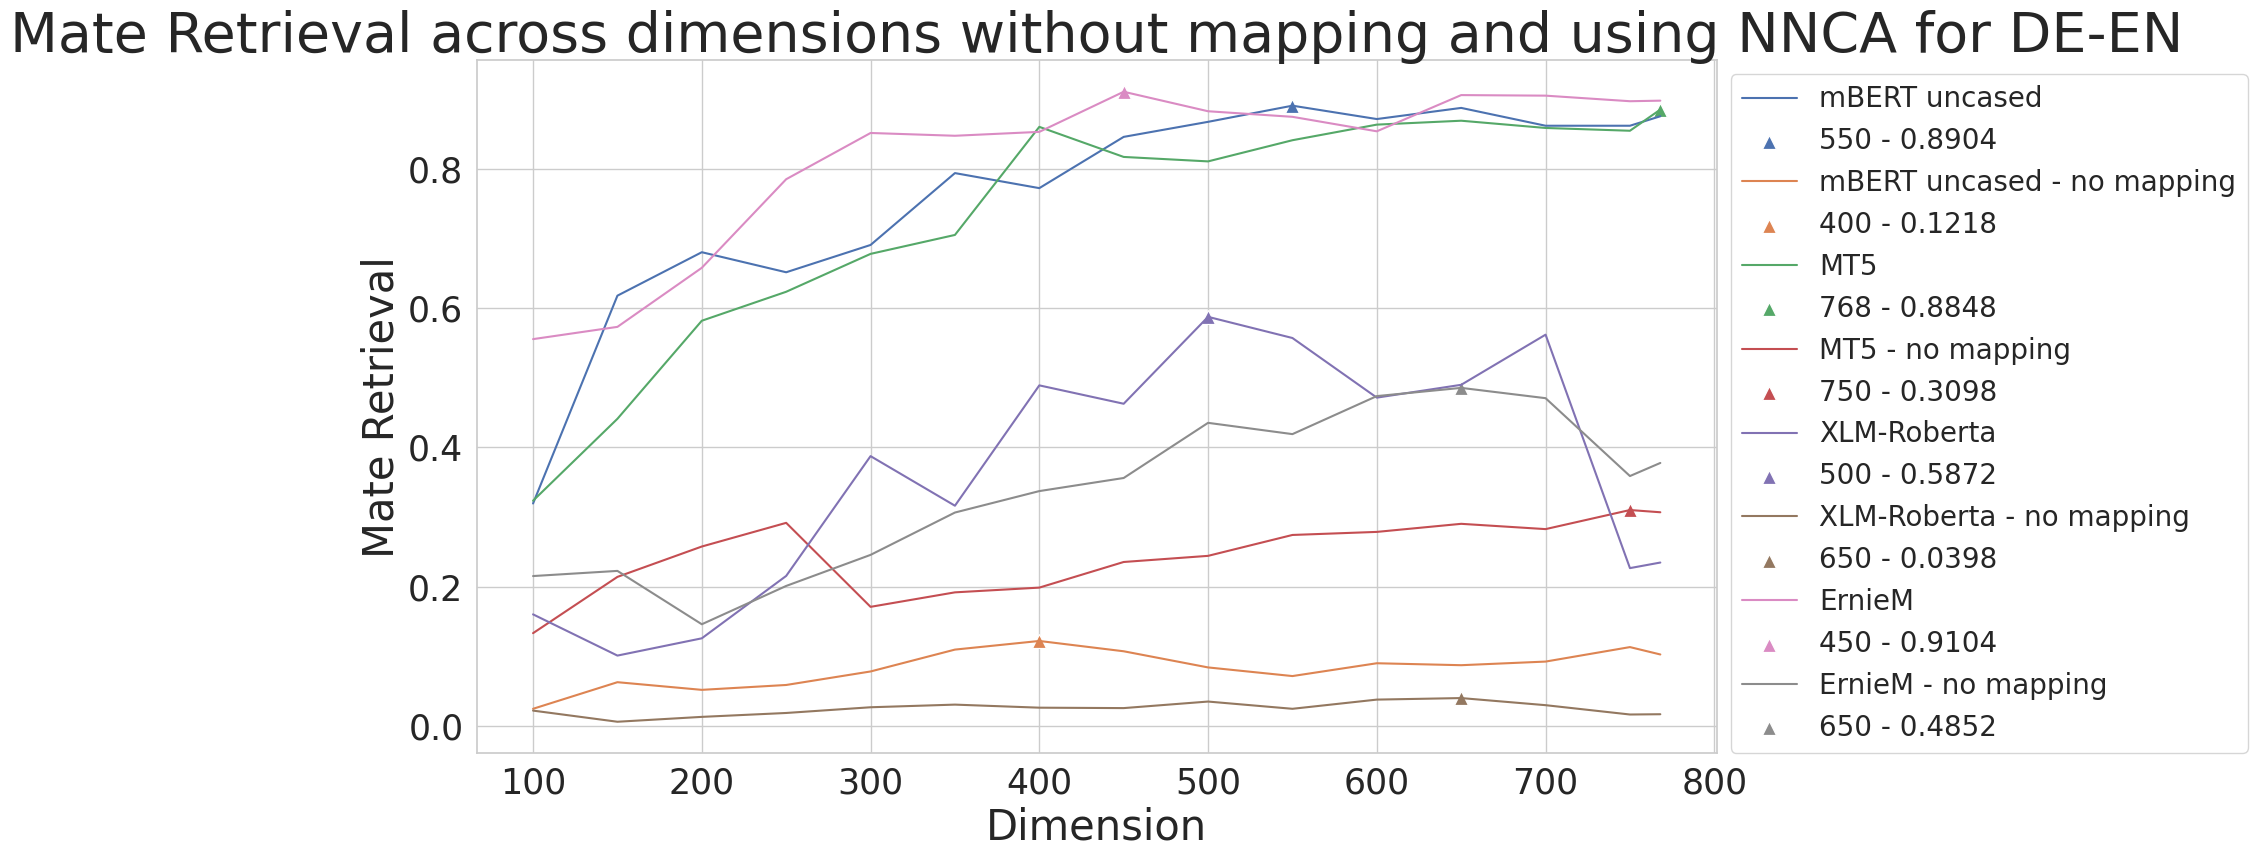

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   42893 MB |   42791 MB |
|       from large pool |  104378 KB |  420439 KB |   40956 MB |   40854 MB |
|       from small pool |       0 KB |    5432 KB |    1936 MB |    1936 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   42893 MB |   42791 MB |
|       from large pool |  104378 KB |  420439 KB |   40956 MB |

100%|██████████| 15/15 [00:03<00:00,  4.58it/s]


[0.9631999731063843, 0.014599999412894249] [600, 100]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   45458 MB |   45357 MB |
|       from large pool |  104378 KB |  420439 KB |   43365 MB |   43263 MB |
|       from small pool |       0 KB |    5432 KB |    2093 MB |    2093 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   45458 MB |   45357 MB |
|       fr

100%|██████████| 15/15 [00:02<00:00,  6.28it/s]


[0.9047999978065491, 0.1727999895811081] [600, 650]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   48024 MB |   47923 MB |
|       from large pool |  104378 KB |  420439 KB |   45775 MB |   45673 MB |
|       from small pool |       0 KB |    5432 KB |    2249 MB |    2249 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   48024 MB |   47923 MB |
|       from

100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


[0.913599967956543, 0.01119999960064888] [450, 100]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   50590 MB |   50488 MB |
|       from large pool |  104378 KB |  420439 KB |   48184 MB |   48082 MB |
|       from small pool |       0 KB |    5432 KB |    2406 MB |    2406 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   50590 MB |   50488 MB |
|       from

100%|██████████| 15/15 [00:02<00:00,  6.30it/s]


[0.9447999596595764, 0.02579999901354313] [750, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   53156 MB |   53054 MB |
|       from large pool |  104378 KB |  420439 KB |   50594 MB |   50492 MB |
|       from small pool |       0 KB |    5432 KB |    2562 MB |    2562 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   53156 MB |   53054 MB |
|       fro

<Figure size 640x480 with 0 Axes>

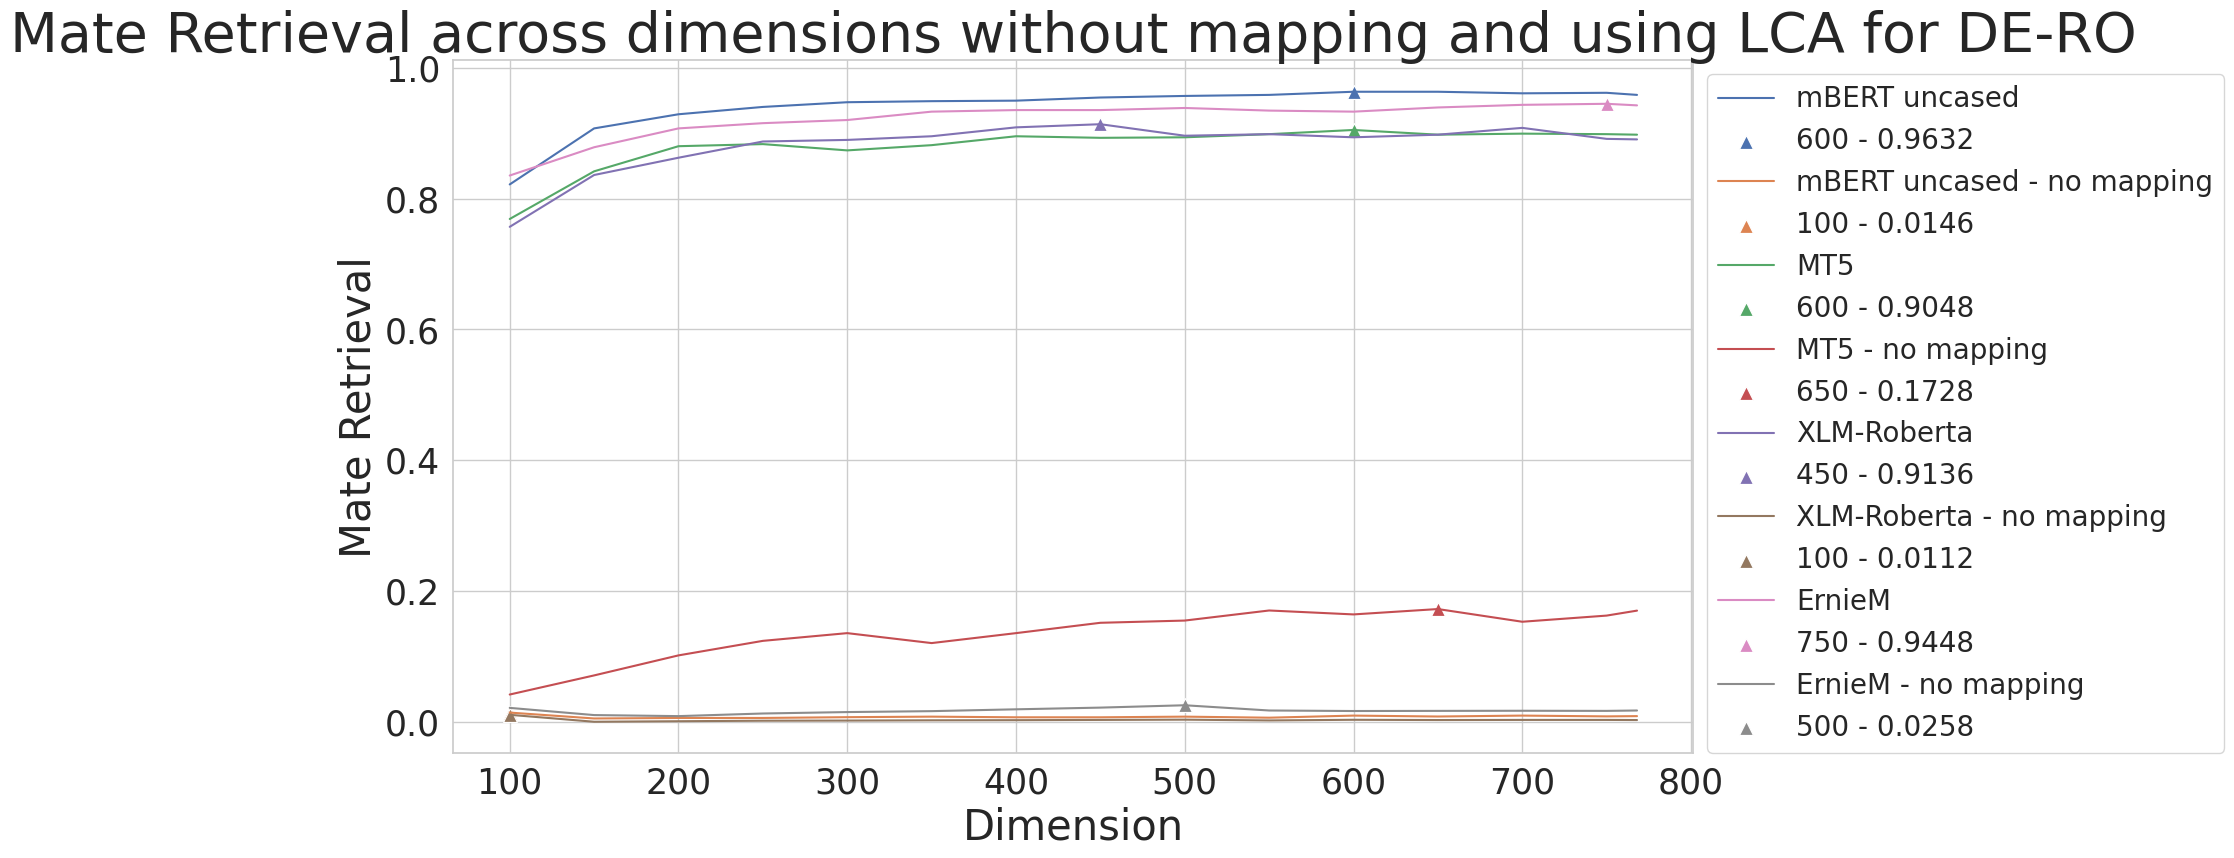

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [06:08<00:00, 24.53s/it]


[0.9567999839782715, 0.014599999412894249] [768, 100]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   58477 MB |   58375 MB |
|       from large pool |  104378 KB |  420439 KB |   55764 MB |   55662 MB |
|       from small pool |       0 KB |    5432 KB |    2713 MB |    2713 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   58477 MB |   58375 MB |
|       fr

100%|██████████| 15/15 [05:51<00:00, 23.40s/it]


[0.9031999707221985, 0.1727999895811081] [700, 650]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   63798 MB |   63696 MB |
|       from large pool |  104378 KB |  420439 KB |   60934 MB |   60832 MB |
|       from small pool |       0 KB |    5432 KB |    2864 MB |    2864 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   63798 MB |   63696 MB |
|       from

100%|██████████| 15/15 [05:46<00:00, 23.07s/it]


[0.9175999760627747, 0.01119999960064888] [768, 100]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   69119 MB |   69017 MB |
|       from large pool |  104378 KB |  420439 KB |   66104 MB |   66002 MB |
|       from small pool |       0 KB |    5432 KB |    3014 MB |    3014 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   69119 MB |   69017 MB |
|       fro

100%|██████████| 15/15 [05:44<00:00, 22.95s/it]


[0.9311999678611755, 0.02579999901354313] [700, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   74440 MB |   74338 MB |
|       from large pool |  104378 KB |  420439 KB |   71275 MB |   71173 MB |
|       from small pool |       0 KB |    5432 KB |    3165 MB |    3165 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   74440 MB |   74338 MB |
|       fro

<Figure size 640x480 with 0 Axes>

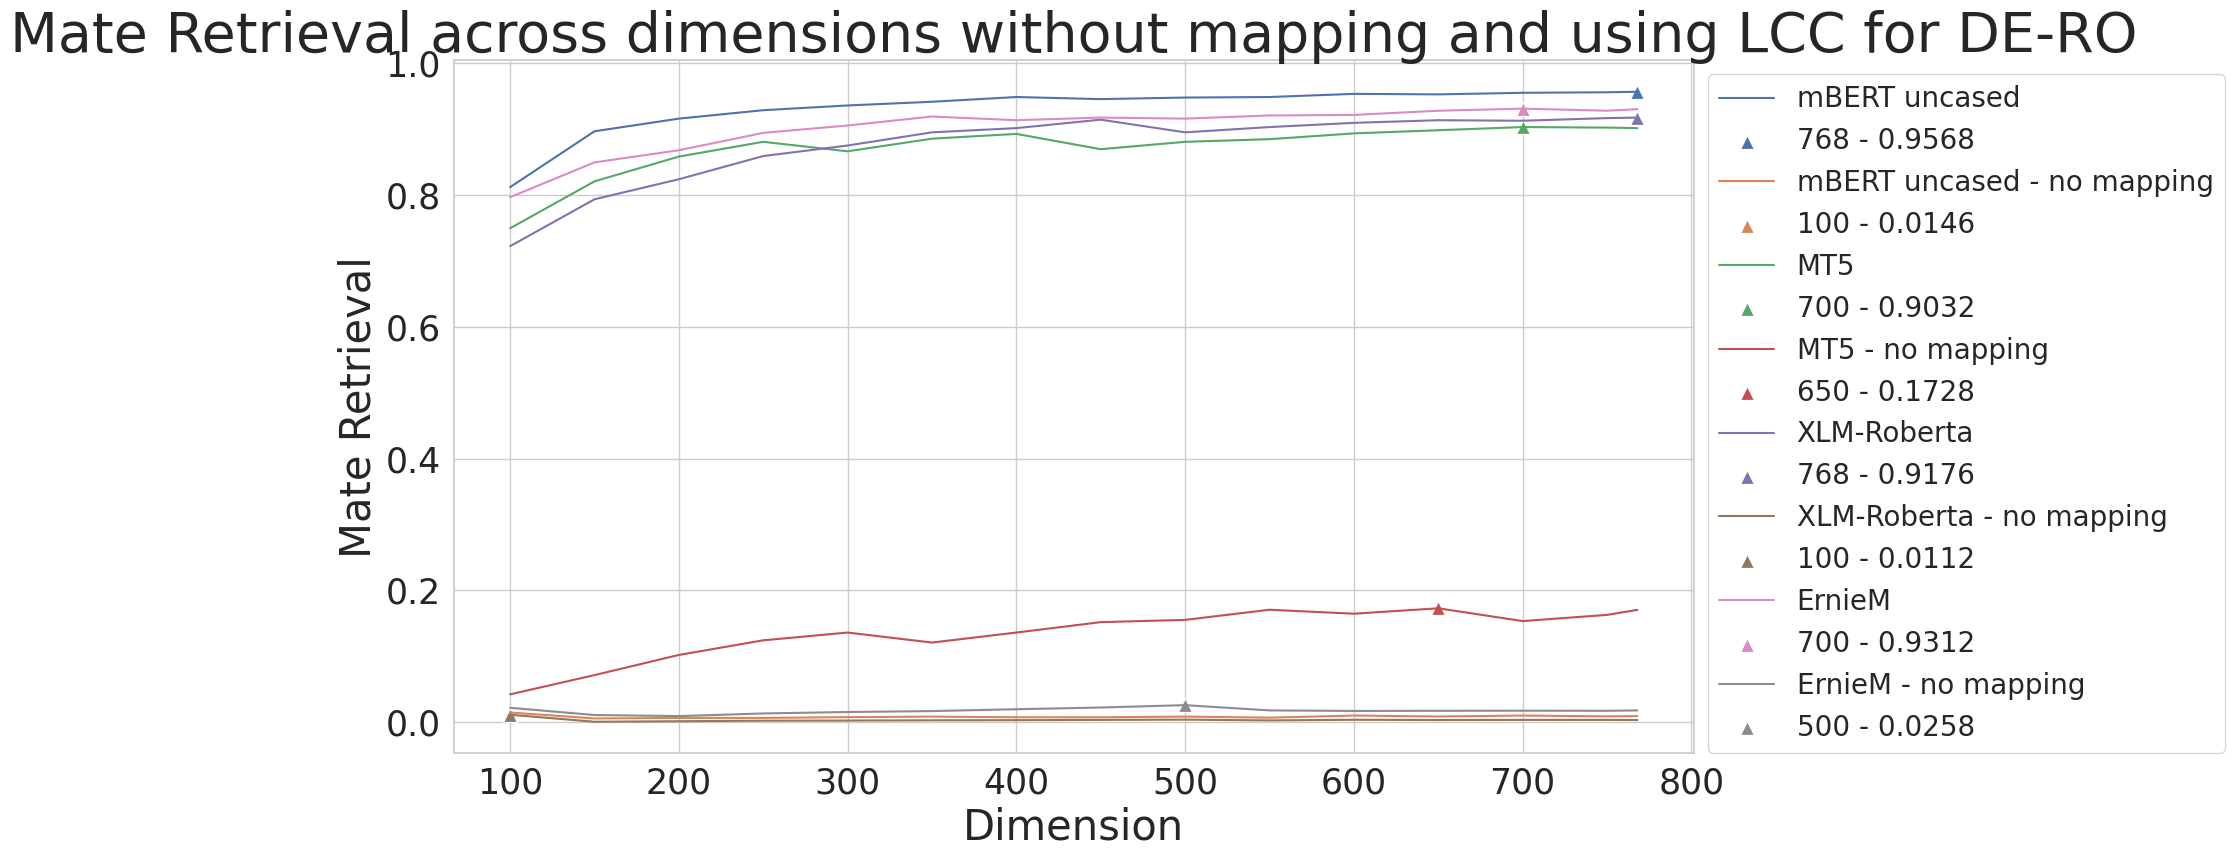

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               200400    
                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.495199978351593 - 0.007400000002235174
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                  

 input_14 (InputLayer)       [(None, 750)]             0         
                                                                 
 dropout_26 (Dropout)        (None, 750)               0         
                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.5672000050544739 - 0.008799999952316284
Model: "model_42"
_________________________________________________________________
 Layer (type)    

40/40 [==============================] - 0s 3ms/step
150 - 0.18320000171661377 - 0.0714000016450882
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
___________________

 dense_17 (Dense)            (None, 500)               250500    
                                                                 
Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.3871999979019165 - 0.15519998967647552
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                  

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 100,600
Trainable params: 100,600
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
10

                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.35999998450279236 - 0.003000000026077032
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense

                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.03680000081658363 - 0.003399999812245369
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_28 (Dro

 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
200 - 0.20559999346733093 - 0.009200000204145908
Model: "model_9"
_________________________________________________________________
 Layer (type)    

Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.35040000081062317 - 0.02579999901354313
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 550)               275550    
                 

<Figure size 640x480 with 0 Axes>

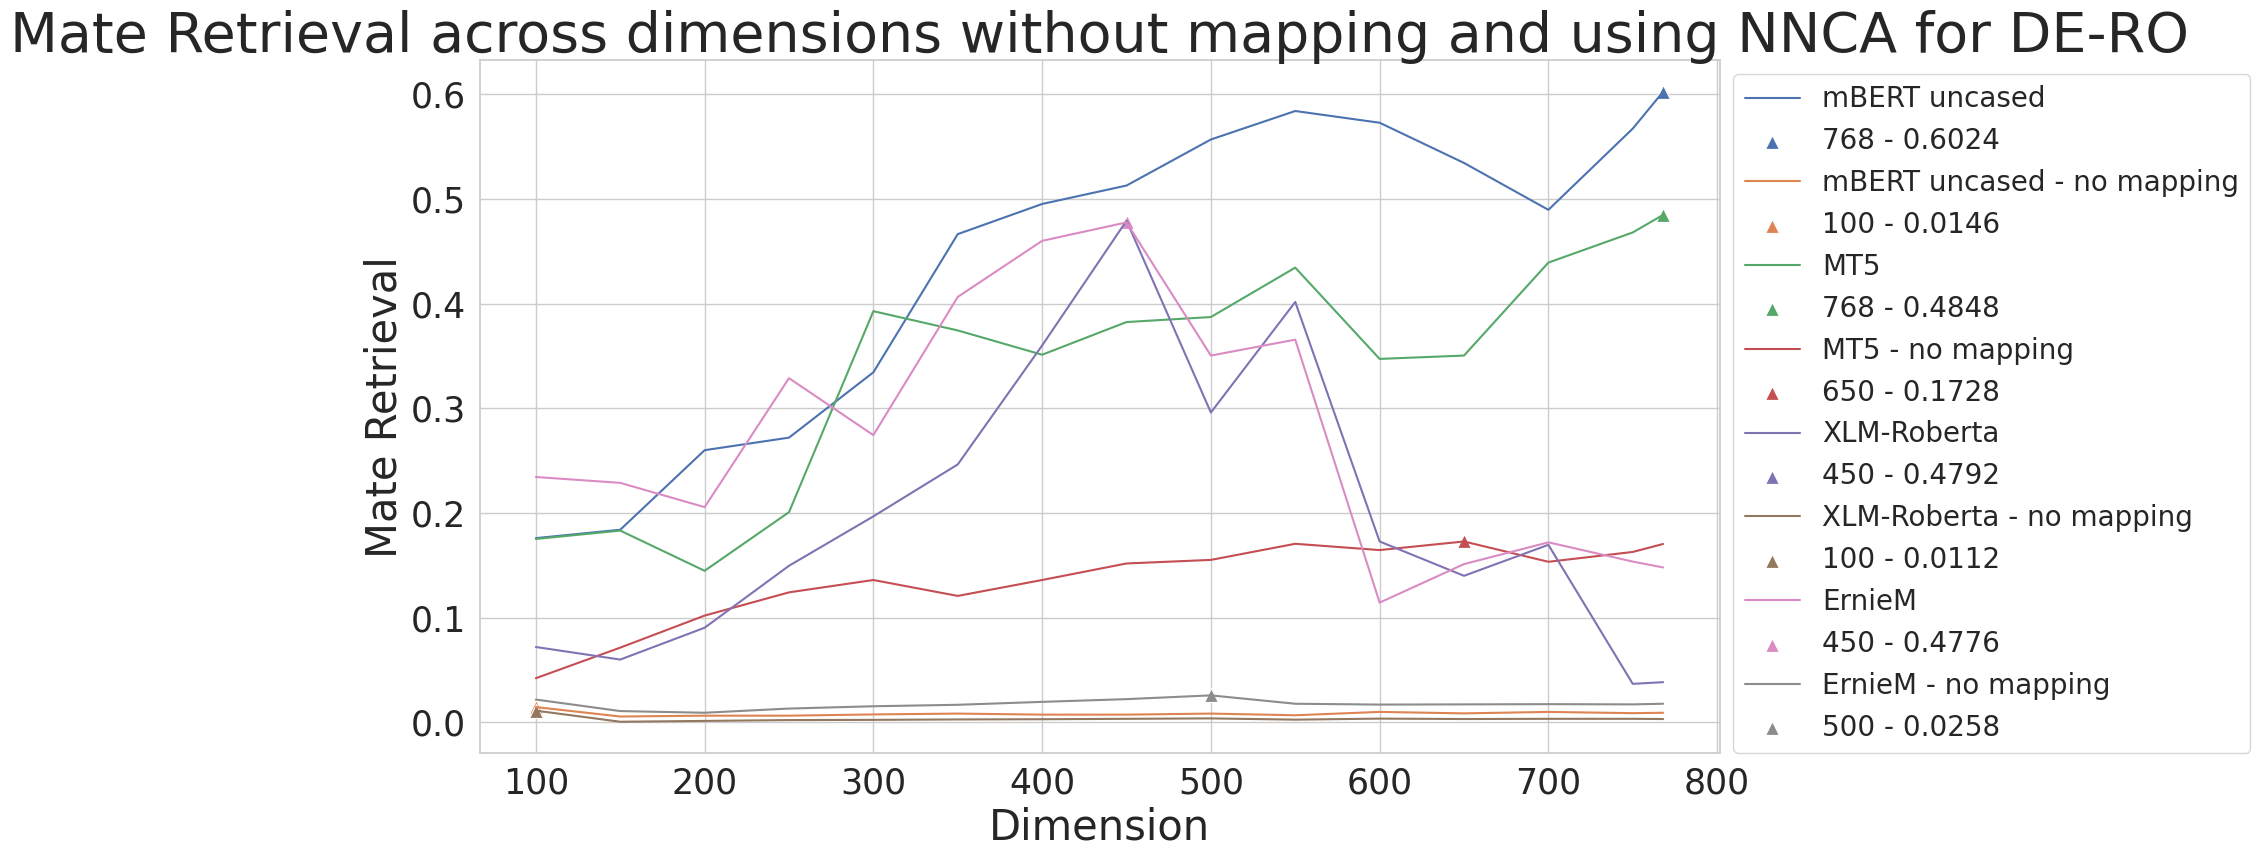

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   83573 MB |   83471 MB |
|       from large pool |  104378 KB |  420439 KB |   79837 MB |   79735 MB |
|       from small pool |       0 KB |    5432 KB |    3736 MB |    3736 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   83573 MB |   83471 MB |
|       from large pool |  104378 KB |  420439 KB |   79837 MB |

100%|██████████| 15/15 [00:03<00:00,  4.34it/s]


[0.9911999702453613, 0.13859999179840088] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   86139 MB |   86037 MB |
|       from large pool |  104378 KB |  420439 KB |   82246 MB |   82144 MB |
|       from small pool |       0 KB |    5432 KB |    3892 MB |    3892 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   86139 MB |   86037 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


[0.9487999677658081, 0.33399999141693115] [750, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   88705 MB |   88603 MB |
|       from large pool |  104378 KB |  420439 KB |   84656 MB |   84554 MB |
|       from small pool |       0 KB |    5432 KB |    4048 MB |    4048 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   88705 MB |   88603 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


[0.974399983882904, 0.021399999037384987] [550, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   91271 MB |   91169 MB |
|       from large pool |  104378 KB |  420439 KB |   87065 MB |   86963 MB |
|       from small pool |       0 KB |    5432 KB |    4205 MB |    4205 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   91271 MB |   91169 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


[0.9887999892234802, 0.2651999890804291] [700, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   93836 MB |   93735 MB |
|       from large pool |  104378 KB |  420439 KB |   89475 MB |   89373 MB |
|       from small pool |       0 KB |    5432 KB |    4361 MB |    4361 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   93836 MB |   93735 MB |
|       from

<Figure size 640x480 with 0 Axes>

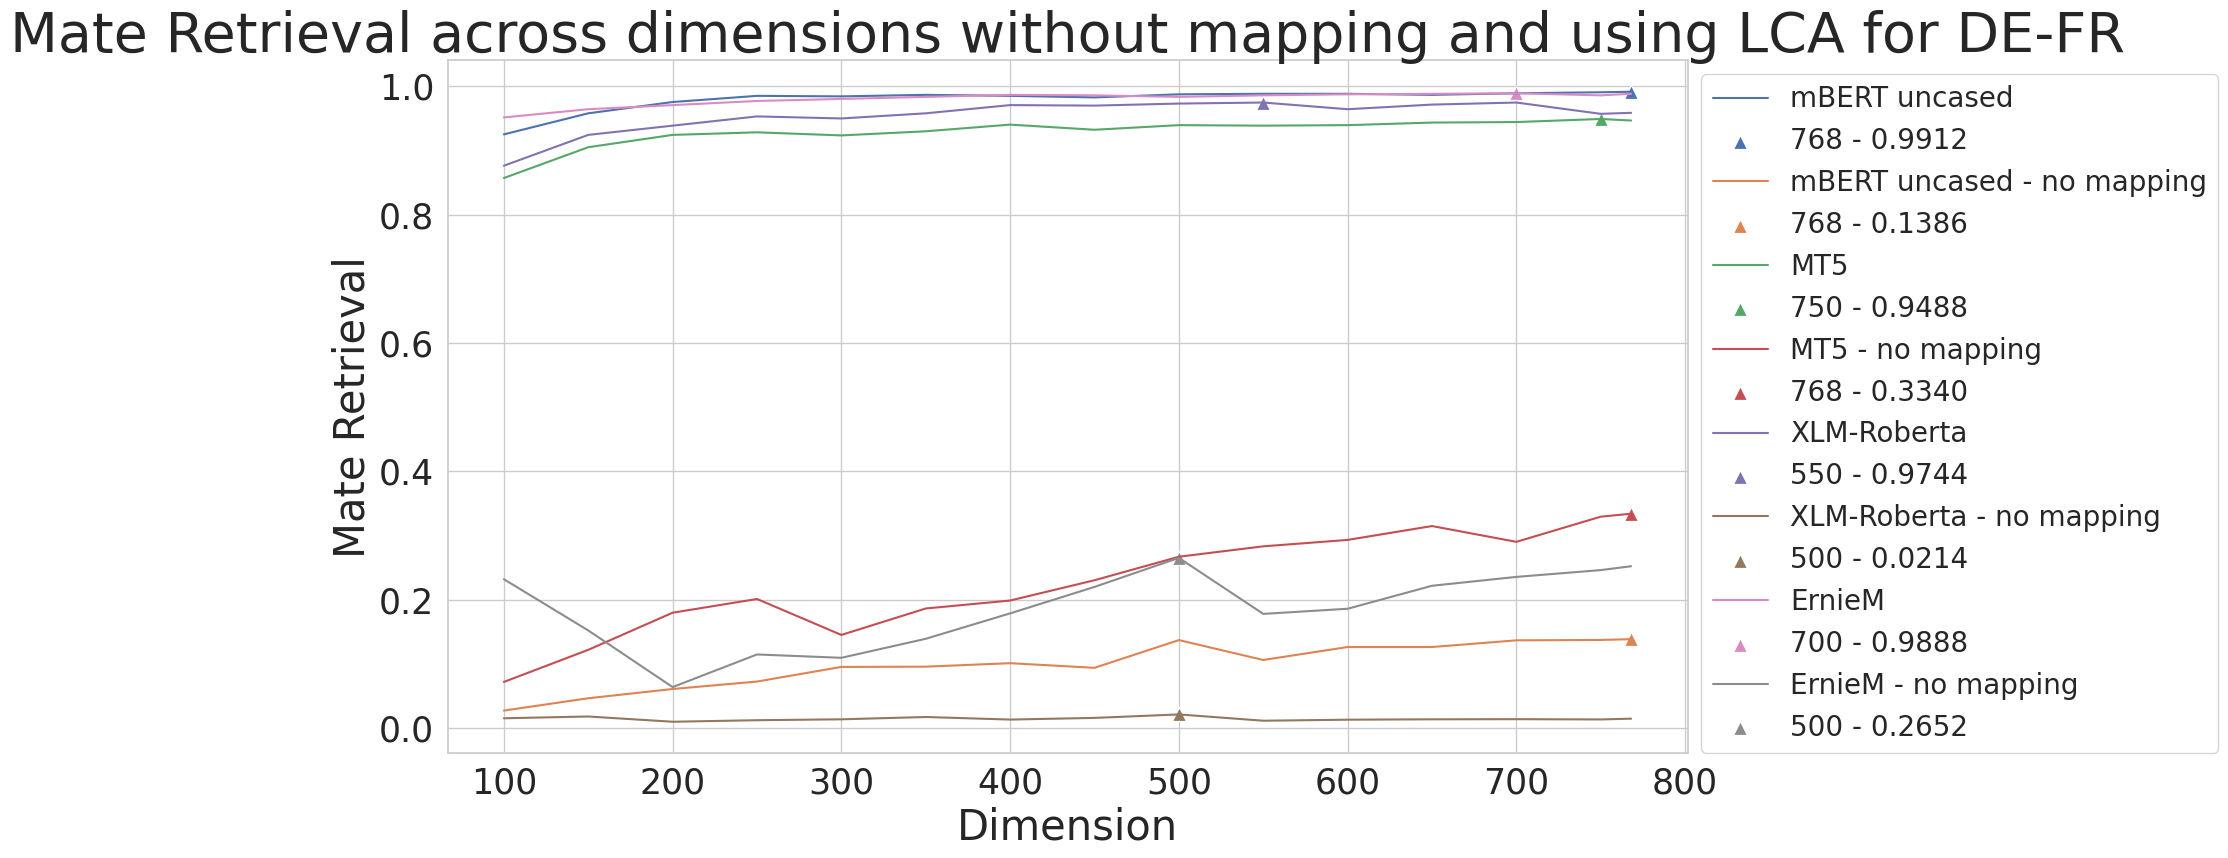

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [05:51<00:00, 23.41s/it]


[0.990399956703186, 0.13859999179840088] [600, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |   99157 MB |   99055 MB |
|       from large pool |  104378 KB |  420439 KB |   94645 MB |   94543 MB |
|       from small pool |       0 KB |    5432 KB |    4512 MB |    4512 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |   99157 MB |   99055 MB |
|       from

100%|██████████| 15/15 [05:49<00:00, 23.33s/it]


[0.9264000058174133, 0.33399999141693115] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  104478 MB |  104376 MB |
|       from large pool |  104378 KB |  420439 KB |   99815 MB |   99713 MB |
|       from small pool |       0 KB |    5432 KB |    4663 MB |    4663 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  104478 MB |  104376 MB |
|       fro

100%|██████████| 15/15 [05:49<00:00, 23.32s/it]


[0.9703999757766724, 0.021399999037384987] [700, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  109799 MB |  109697 MB |
|       from large pool |  104378 KB |  420439 KB |  104985 MB |  104883 MB |
|       from small pool |       0 KB |    5432 KB |    4813 MB |    4813 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  109799 MB |  109697 MB |
|       fr

100%|██████████| 15/15 [05:45<00:00, 23.00s/it]


[0.9871999621391296, 0.2651999890804291] [450, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  115120 MB |  115018 MB |
|       from large pool |  104378 KB |  420439 KB |  110156 MB |  110054 MB |
|       from small pool |       0 KB |    5432 KB |    4964 MB |    4964 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  115120 MB |  115018 MB |
|       from

<Figure size 640x480 with 0 Axes>

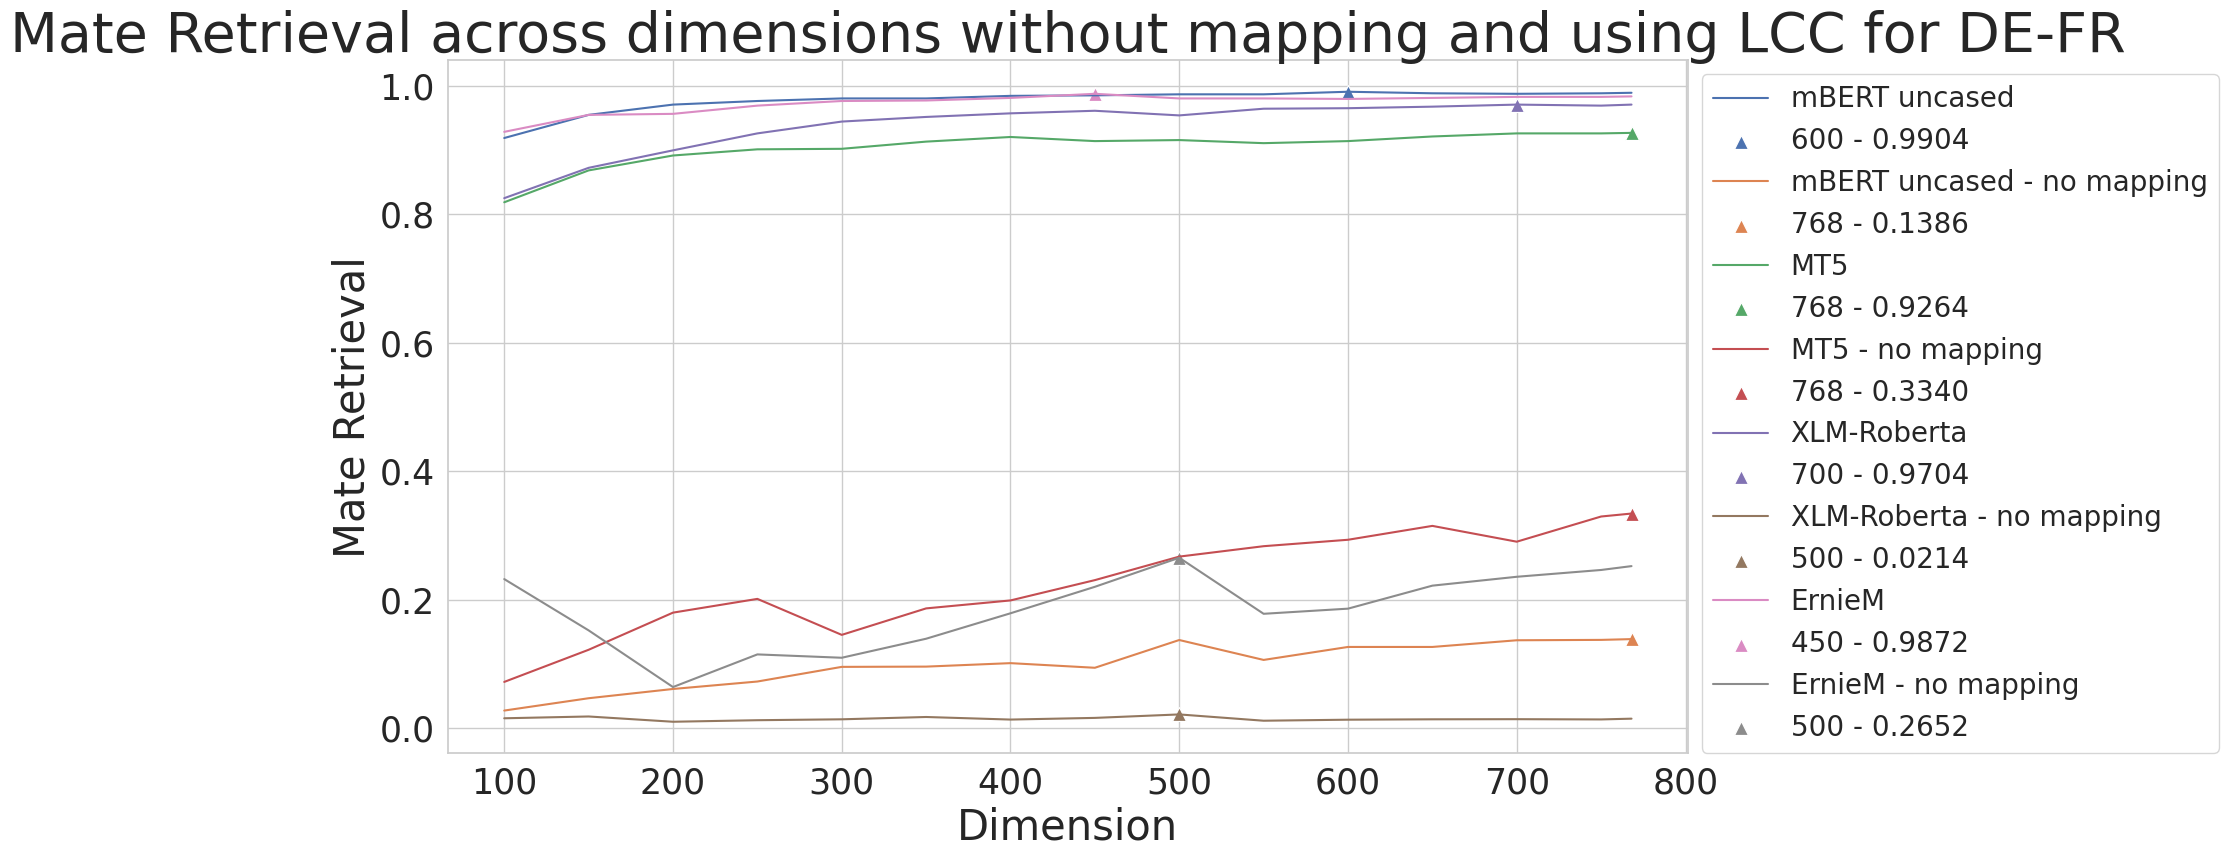

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               200400    
                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.7775999903678894 - 0.10119999945163727
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                  

 input_14 (InputLayer)       [(None, 750)]             0         
                                                                 
 dropout_26 (Dropout)        (None, 750)               0         
                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.925599992275238 - 0.13740000128746033
Model: "model_42"
_________________________________________________________________
 Layer (type)      

40/40 [==============================] - 0s 3ms/step
150 - 0.3224000036716461 - 0.12199999392032623
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
___________________

 dense_17 (Dense)            (None, 500)               250500    
                                                                 
Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.7432000041007996 - 0.2669999897480011
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                   

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 100,600
Trainable params: 100,600
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
10

                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.5216000080108643 - 0.013399999588727951
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense)

                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.3807999789714813 - 0.013599999248981476
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_28 (Drop

 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 2ms/step
200 - 0.43199998140335083 - 0.06399999558925629
Model: "model_9"
_________________________________________________________________
 Layer (type)     

Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.764799952507019 - 0.2651999890804291
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 550)               275550    
                                          

<Figure size 640x480 with 0 Axes>

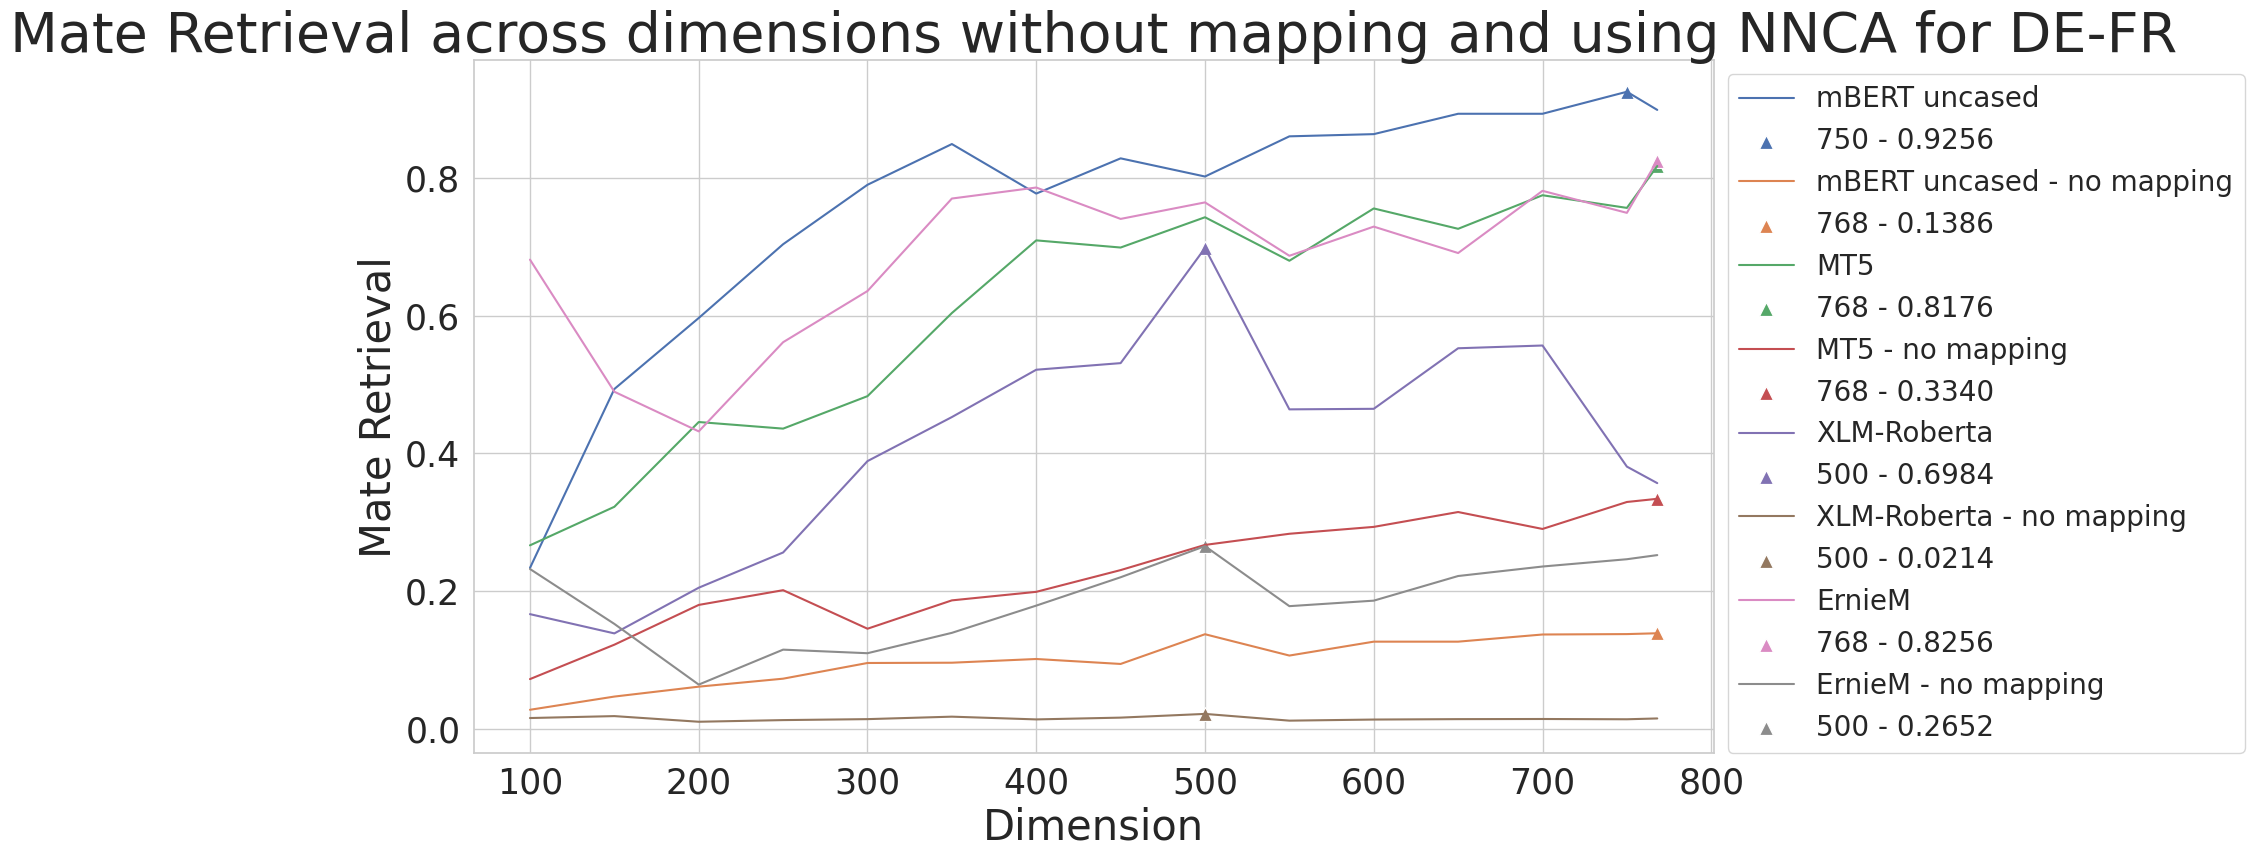

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  124253 MB |  124151 MB |
|       from large pool |  104378 KB |  420439 KB |  118718 MB |  118616 MB |
|       from small pool |       0 KB |    5432 KB |    5535 MB |    5535 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  124253 MB |  124151 MB |
|       from large pool |  104378 KB |  420439 KB |  118718 MB |

100%|██████████| 15/15 [00:03<00:00,  4.53it/s]


[0.9855999946594238, 0.18379999697208405] [750, 600]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  126819 MB |  126717 MB |
|       from large pool |  104378 KB |  420439 KB |  121127 MB |  121025 MB |
|       from small pool |       0 KB |    5432 KB |    5691 MB |    5691 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  126819 MB |  126717 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  5.50it/s]


[0.9495999813079834, 0.5849999785423279] [650, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  129385 MB |  129283 MB |
|       from large pool |  104378 KB |  420439 KB |  123537 MB |  123435 MB |
|       from small pool |       0 KB |    5432 KB |    5848 MB |    5848 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  129385 MB |  129283 MB |
|       from

100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


[0.9503999948501587, 0.05999999865889549] [450, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  131951 MB |  131849 MB |
|       from large pool |  104378 KB |  420439 KB |  125946 MB |  125844 MB |
|       from small pool |       0 KB |    5432 KB |    6004 MB |    6004 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  131951 MB |  131849 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


[0.9871999621391296, 0.520799994468689] [450, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  134517 MB |  134415 MB |
|       from large pool |  104378 KB |  420439 KB |  128356 MB |  128254 MB |
|       from small pool |       0 KB |    5432 KB |    6160 MB |    6160 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  134517 MB |  134415 MB |
|       from 

<Figure size 640x480 with 0 Axes>

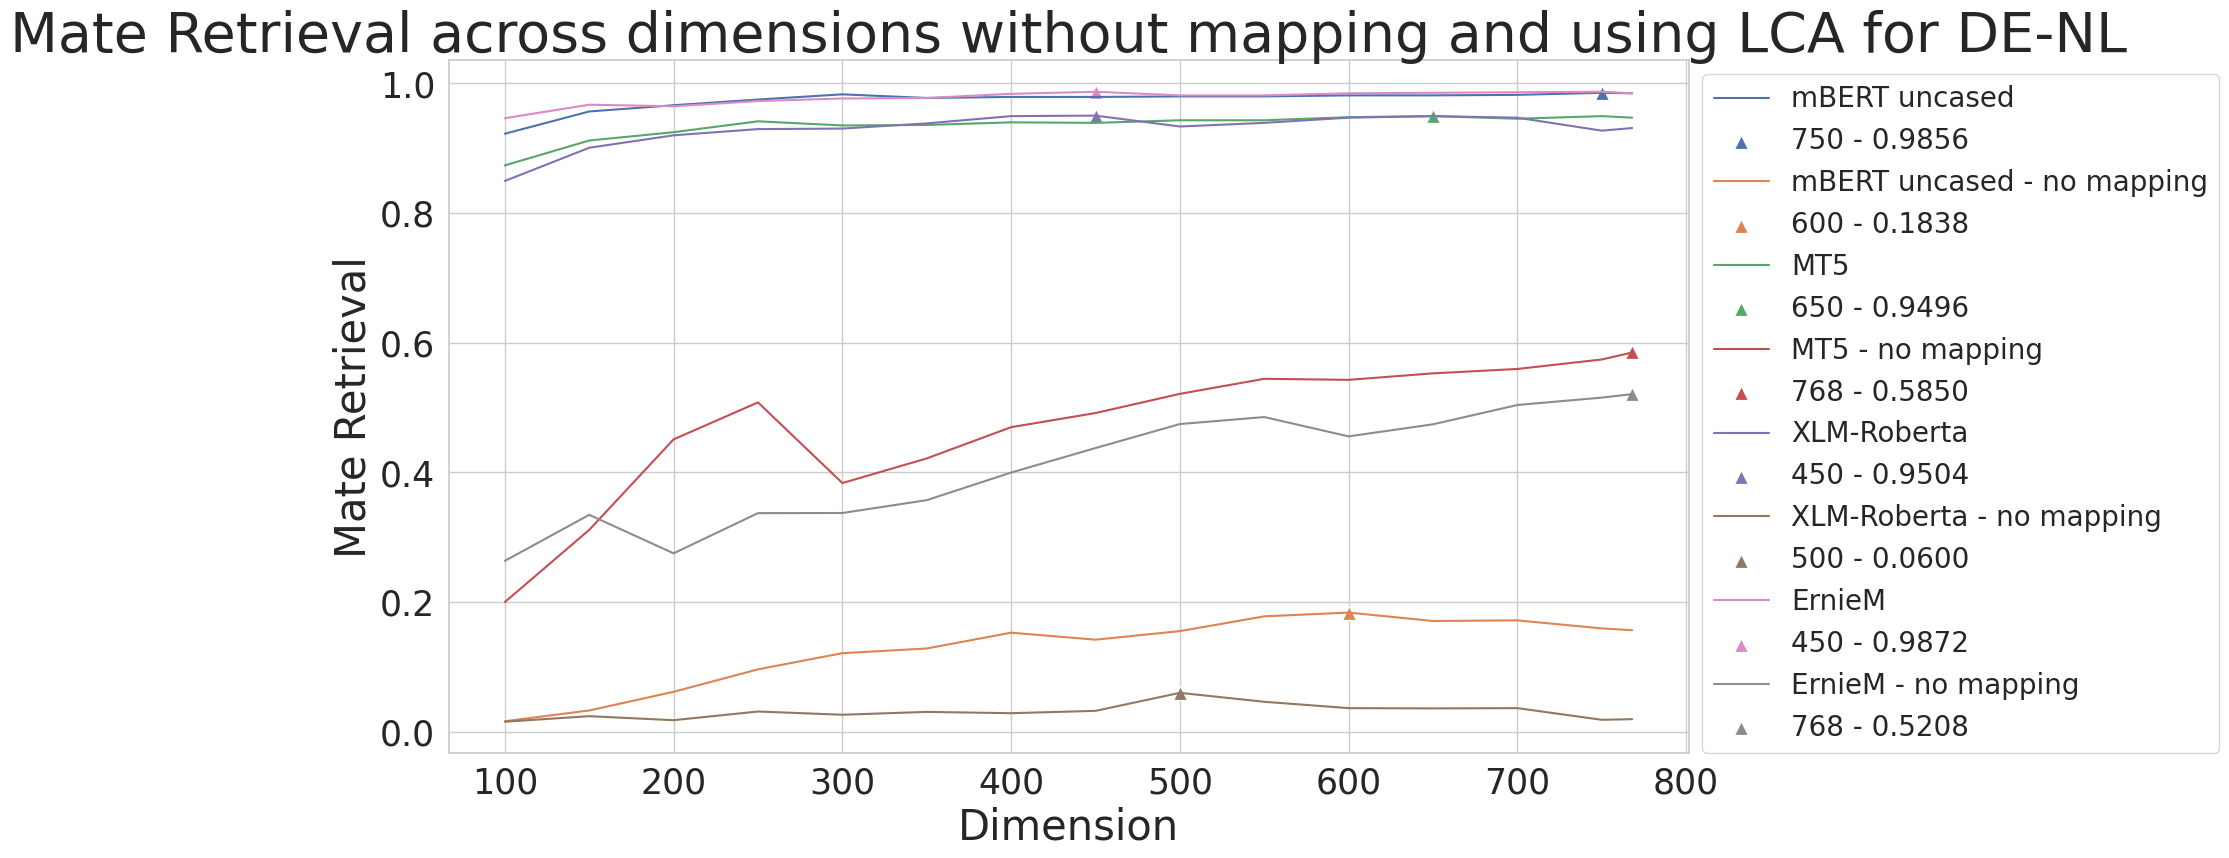

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [05:45<00:00, 23.03s/it]


[0.9815999865531921, 0.18379999697208405] [500, 600]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  139837 MB |  139735 MB |
|       from large pool |  104378 KB |  420439 KB |  133526 MB |  133424 MB |
|       from small pool |       0 KB |    5432 KB |    6311 MB |    6311 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  139837 MB |  139735 MB |
|       fro

100%|██████████| 15/15 [05:40<00:00, 22.72s/it]


[0.9327999949455261, 0.5849999785423279] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  145158 MB |  145056 MB |
|       from large pool |  104378 KB |  420439 KB |  138696 MB |  138594 MB |
|       from small pool |       0 KB |    5432 KB |    6462 MB |    6462 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  145158 MB |  145056 MB |
|       from

100%|██████████| 15/15 [05:43<00:00, 22.87s/it]


[0.9575999975204468, 0.05999999865889549] [750, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  150479 MB |  150377 MB |
|       from large pool |  104378 KB |  420439 KB |  143866 MB |  143764 MB |
|       from small pool |       0 KB |    5432 KB |    6612 MB |    6612 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  150479 MB |  150377 MB |
|       fro

100%|██████████| 15/15 [05:42<00:00, 22.85s/it]


[0.9863999485969543, 0.520799994468689] [450, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  155800 MB |  155698 MB |
|       from large pool |  104378 KB |  420439 KB |  149037 MB |  148935 MB |
|       from small pool |       0 KB |    5432 KB |    6763 MB |    6763 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  155800 MB |  155698 MB |
|       from 

<Figure size 640x480 with 0 Axes>

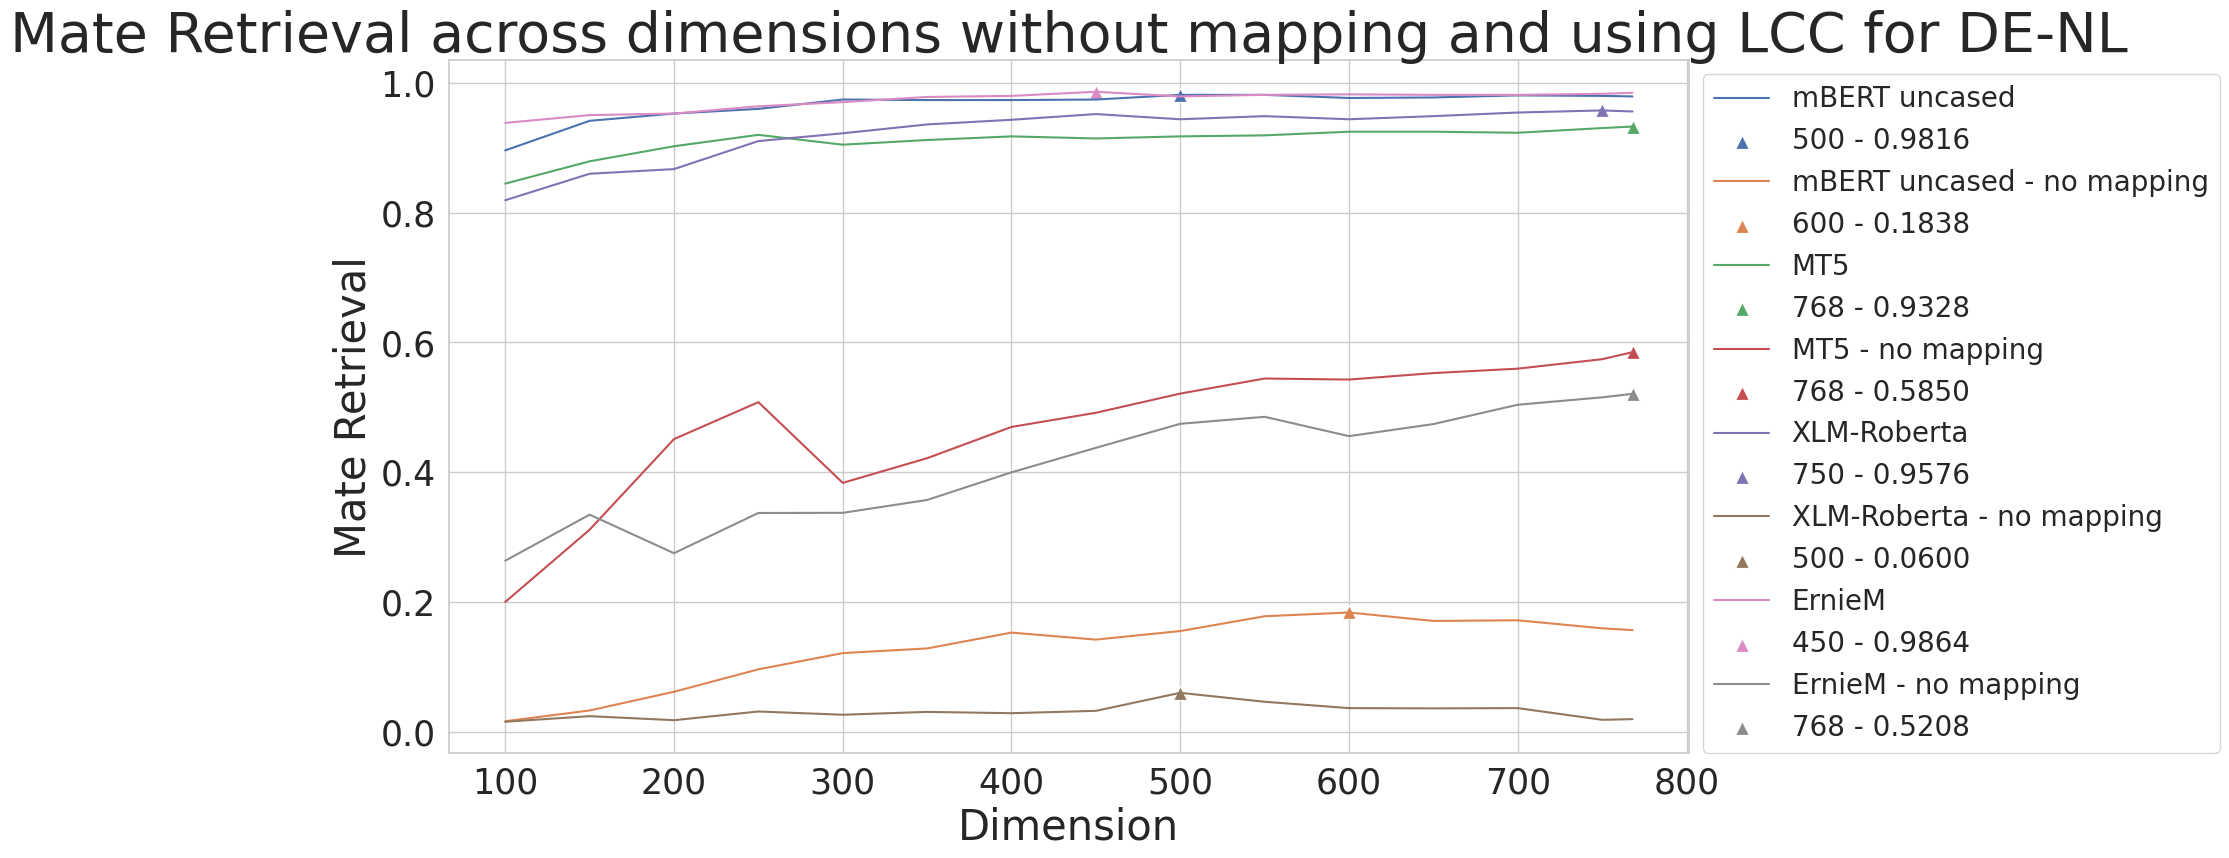

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               200400    
                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.7791999578475952 - 0.15279999375343323
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                  

 input_14 (InputLayer)       [(None, 750)]             0         
                                                                 
 dropout_26 (Dropout)        (None, 750)               0         
                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.8567999601364136 - 0.15940000116825104
Model: "model_42"
_________________________________________________________________
 Layer (type)     

40/40 [==============================] - 0s 3ms/step
150 - 0.5992000102996826 - 0.31139999628067017
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
___________________

 dense_17 (Dense)            (None, 500)               250500    
                                                                 
Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.7752000093460083 - 0.5212000012397766
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                   

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 100,600
Trainable params: 100,600
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
10

                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.5471999645233154 - 0.028599999845027924
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense)

                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.2639999985694885 - 0.018400000408291817
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_28 (Drop

 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
200 - 0.5911999940872192 - 0.2751999795436859
Model: "model_9"
_________________________________________________________________
 Layer (type)       

Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.8583999872207642 - 0.4745999872684479
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 550)               275550    
                                         

<Figure size 640x480 with 0 Axes>

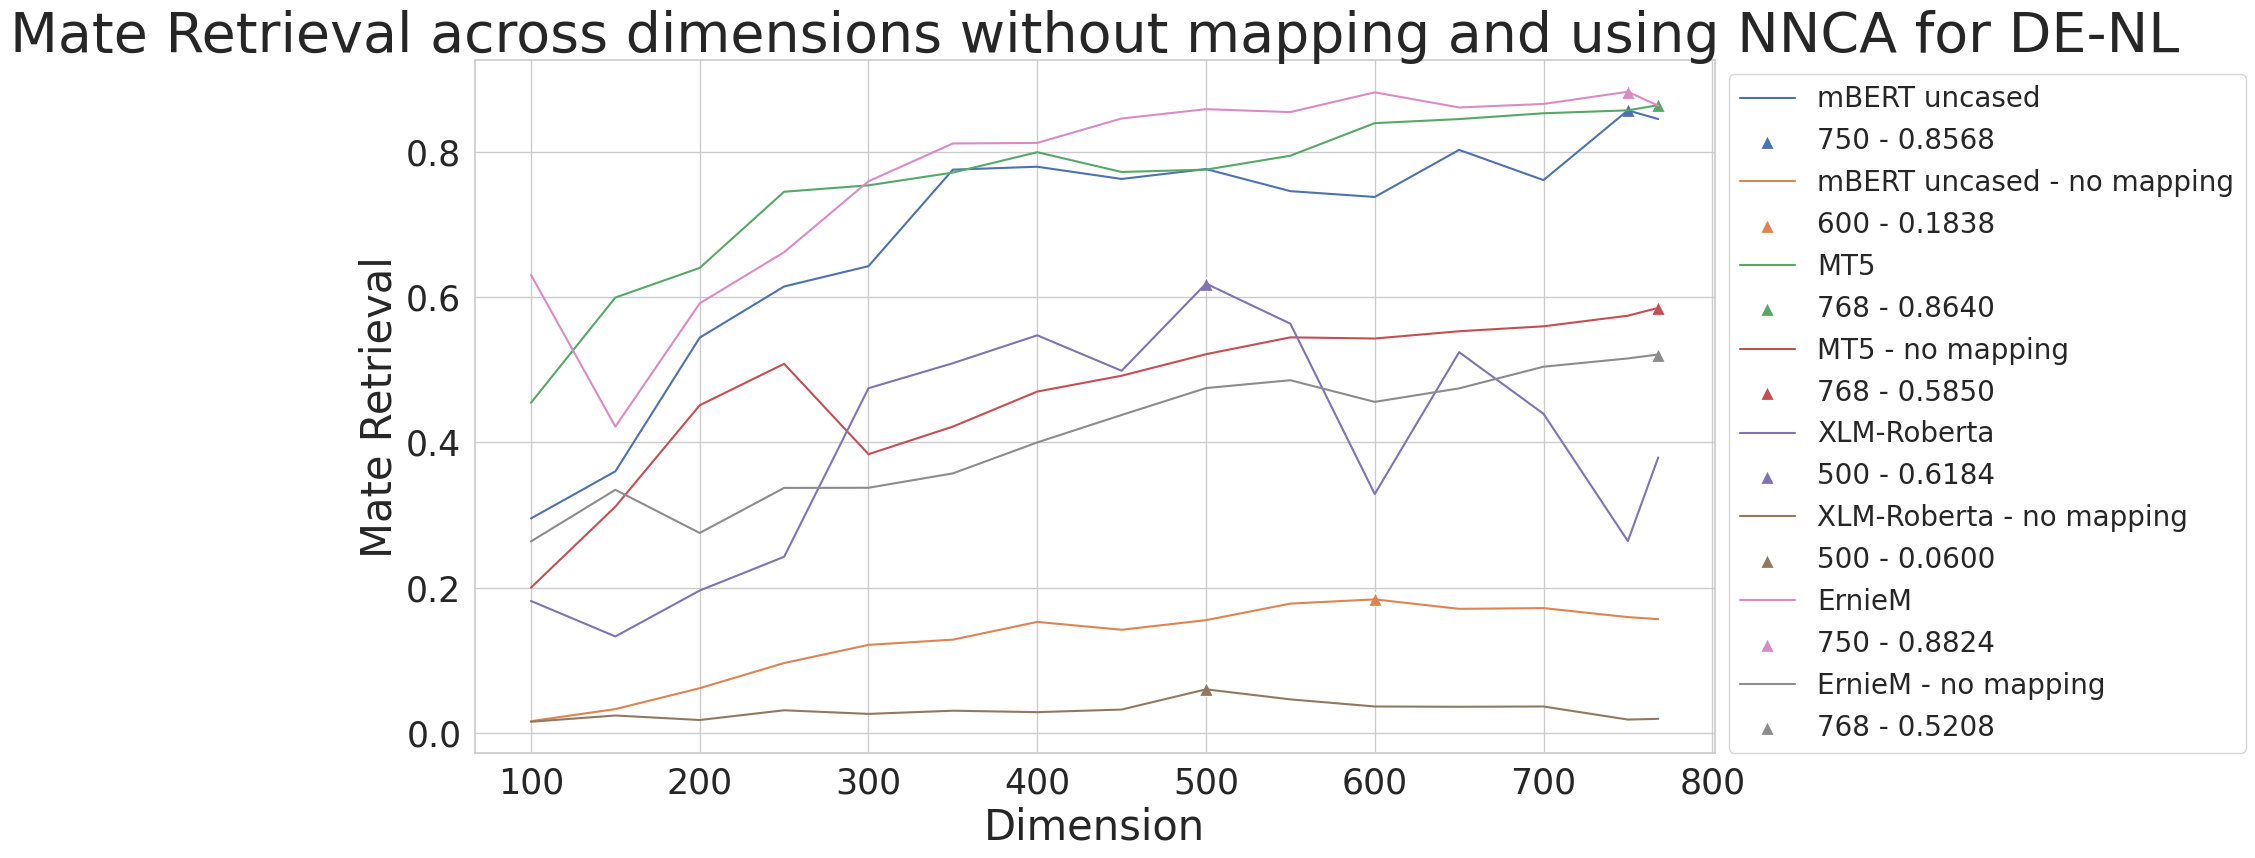

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  164933 MB |  164831 MB |
|       from large pool |  104378 KB |  420439 KB |  157599 MB |  157497 MB |
|       from small pool |       0 KB |    5432 KB |    7334 MB |    7334 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  164933 MB |  164831 MB |
|       from large pool |  104378 KB |  420439 KB |  157599 MB |

100%|██████████| 15/15 [00:03<00:00,  4.52it/s]


[0.9655999541282654, 0.012999999336898327] [750, 150]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  167499 MB |  167397 MB |
|       from large pool |  104378 KB |  420439 KB |  160008 MB |  159906 MB |
|       from small pool |       0 KB |    5432 KB |    7490 MB |    7490 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  167499 MB |  167397 MB |
|       fr

100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


[0.9351999759674072, 0.25200000405311584] [400, 250]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  170065 MB |  169963 MB |
|       from large pool |  104378 KB |  420439 KB |  162418 MB |  162316 MB |
|       from small pool |       0 KB |    5432 KB |    7647 MB |    7647 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  170065 MB |  169963 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  5.46it/s]


[0.9440000057220459, 0.054999999701976776] [450, 600]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  172631 MB |  172529 MB |
|       from large pool |  104378 KB |  420439 KB |  164827 MB |  164725 MB |
|       from small pool |       0 KB |    5432 KB |    7803 MB |    7803 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  172631 MB |  172529 MB |
|       fr

100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


[0.9751999974250793, 0.4262000024318695] [768, 700]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  175197 MB |  175095 MB |
|       from large pool |  104378 KB |  420439 KB |  167237 MB |  167135 MB |
|       from small pool |       0 KB |    5432 KB |    7960 MB |    7960 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  175197 MB |  175095 MB |
|       from

<Figure size 640x480 with 0 Axes>

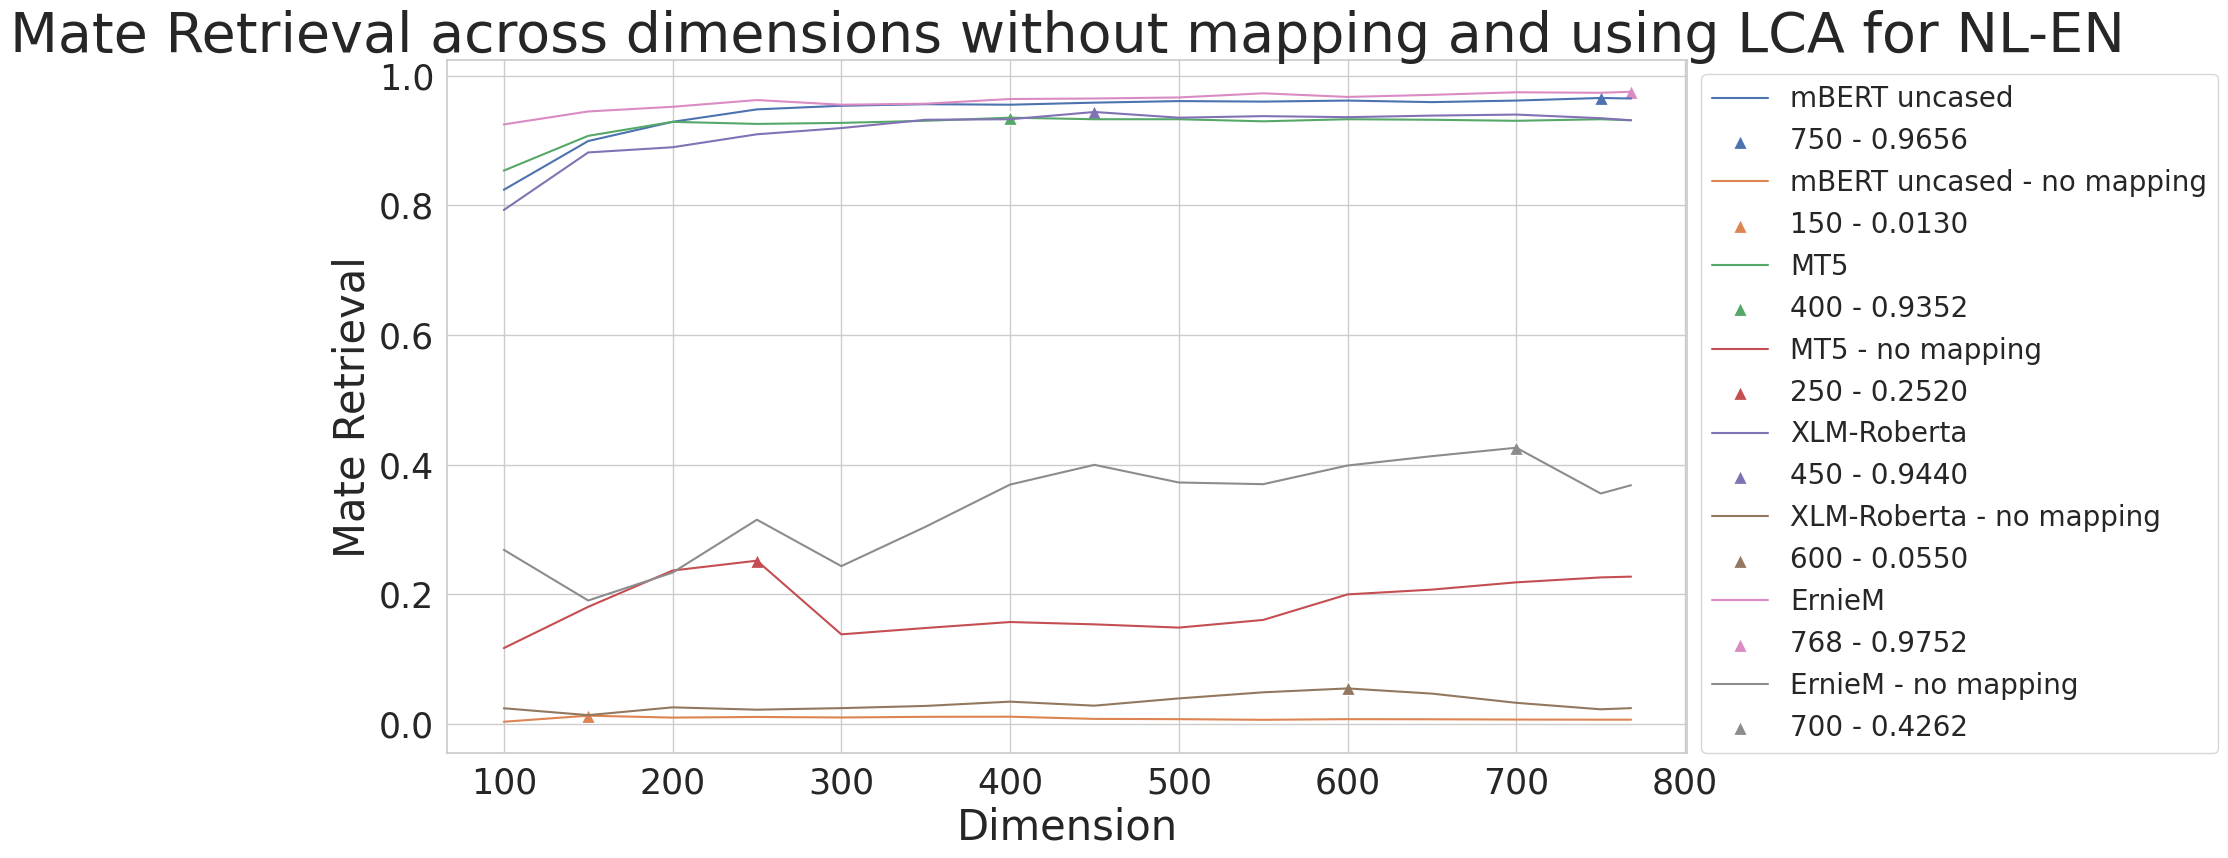

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [05:48<00:00, 23.26s/it]


[0.9583999514579773, 0.012999999336898327] [750, 150]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  180518 MB |  180416 MB |
|       from large pool |  104378 KB |  420439 KB |  172407 MB |  172305 MB |
|       from small pool |       0 KB |    5432 KB |    8110 MB |    8110 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  180518 MB |  180416 MB |
|       fr

100%|██████████| 15/15 [05:45<00:00, 23.00s/it]


[0.9335999488830566, 0.25200000405311584] [768, 250]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  185838 MB |  185736 MB |
|       from large pool |  104378 KB |  420439 KB |  177577 MB |  177475 MB |
|       from small pool |       0 KB |    5432 KB |    8261 MB |    8261 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  185838 MB |  185736 MB |
|       fro

100%|██████████| 15/15 [05:46<00:00, 23.13s/it]


[0.9391999840736389, 0.054999999701976776] [768, 600]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  191159 MB |  191057 MB |
|       from large pool |  104378 KB |  420439 KB |  182747 MB |  182645 MB |
|       from small pool |       0 KB |    5432 KB |    8411 MB |    8411 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  191159 MB |  191057 MB |
|       fr

100%|██████████| 15/15 [05:47<00:00, 23.17s/it]


[0.9639999866485596, 0.4262000024318695] [600, 700]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  196480 MB |  196378 MB |
|       from large pool |  104378 KB |  420439 KB |  187918 MB |  187816 MB |
|       from small pool |       0 KB |    5432 KB |    8562 MB |    8562 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  196480 MB |  196378 MB |
|       from

<Figure size 640x480 with 0 Axes>

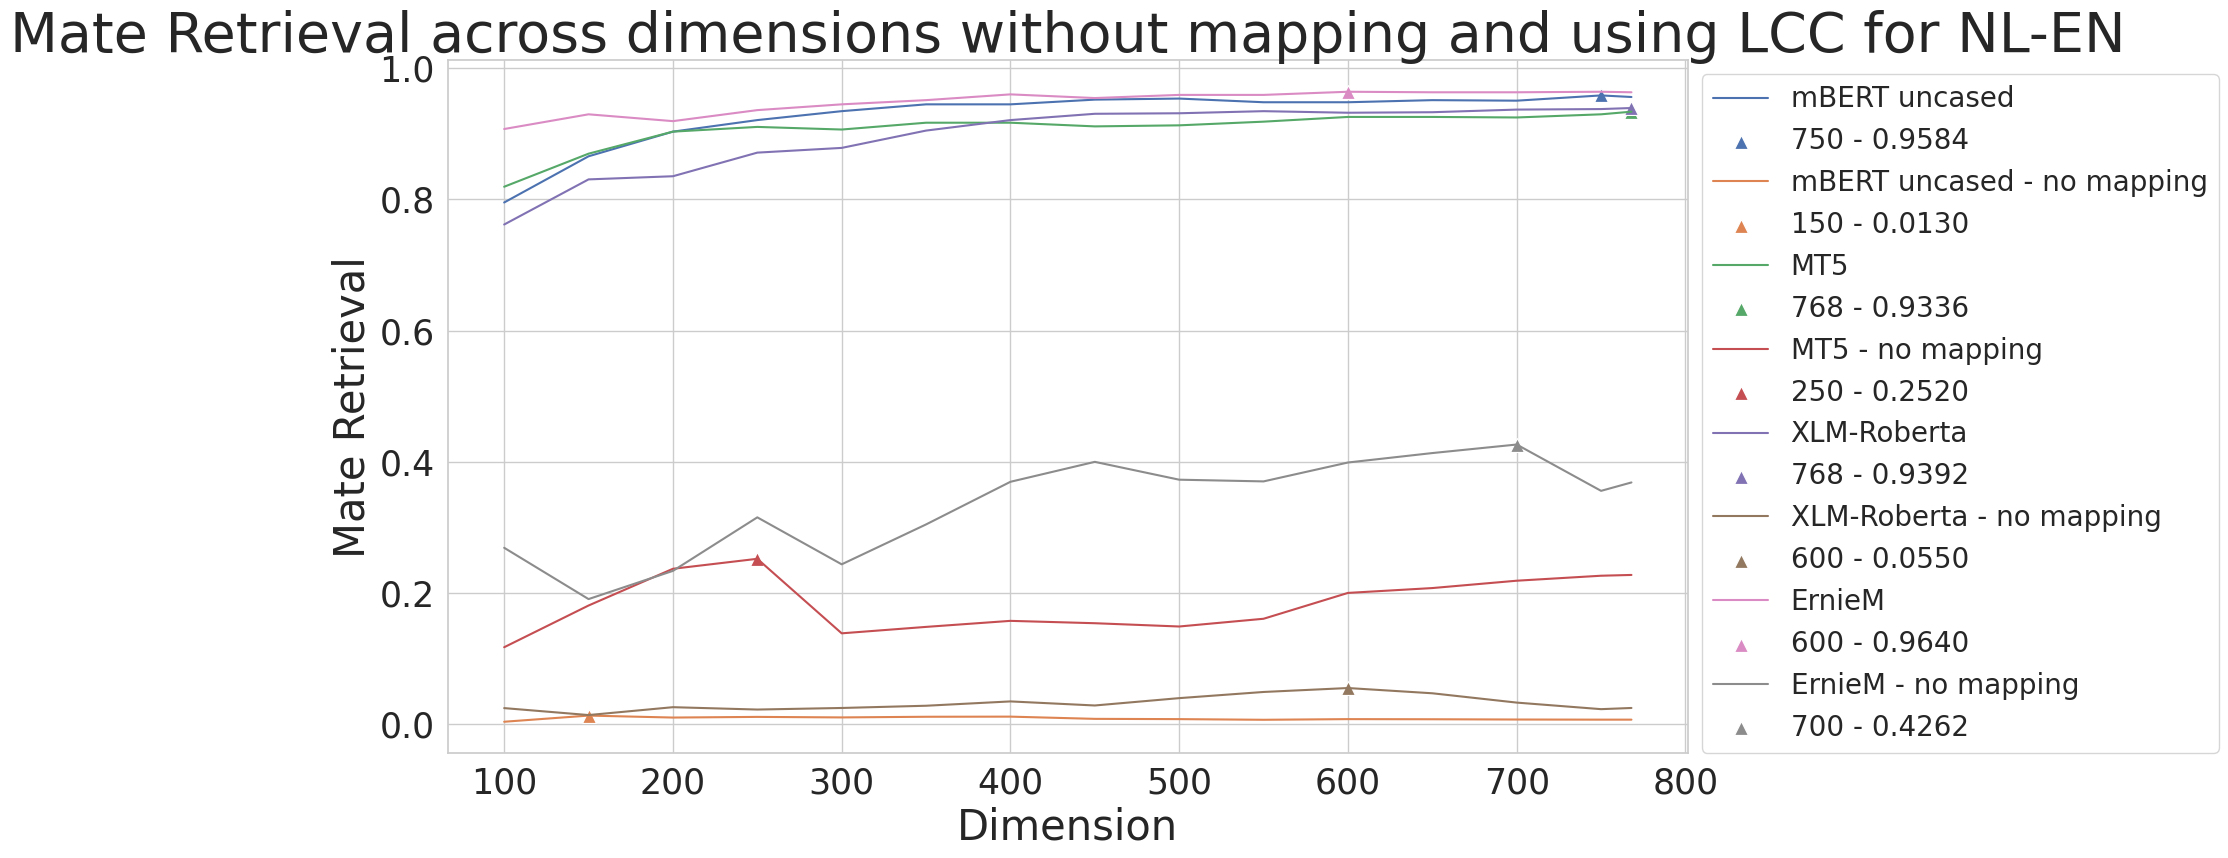

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               200400    
                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.6991999745368958 - 0.011399999260902405
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                 

 input_14 (InputLayer)       [(None, 750)]             0         
                                                                 
 dropout_26 (Dropout)        (None, 750)               0         
                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.839199960231781 - 0.006799999624490738
Model: "model_42"
_________________________________________________________________
 Layer (type)     

40/40 [==============================] - 0s 3ms/step
150 - 0.30799999833106995 - 0.18079999089241028
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
__________________

 dense_17 (Dense)            (None, 500)               250500    
                                                                 
Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.8071999549865723 - 0.14880000054836273
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                  

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 100,600
Trainable params: 100,600
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
10

                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.4567999839782715 - 0.03460000082850456
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense) 

                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.31839999556541443 - 0.02279999852180481
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_28 (Drop

 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
200 - 0.5807999968528748 - 0.23359999060630798
Model: "model_9"
_________________________________________________________________
 Layer (type)      

Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.8327999711036682 - 0.3725999891757965
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 550)               275550    
                                         

<Figure size 640x480 with 0 Axes>

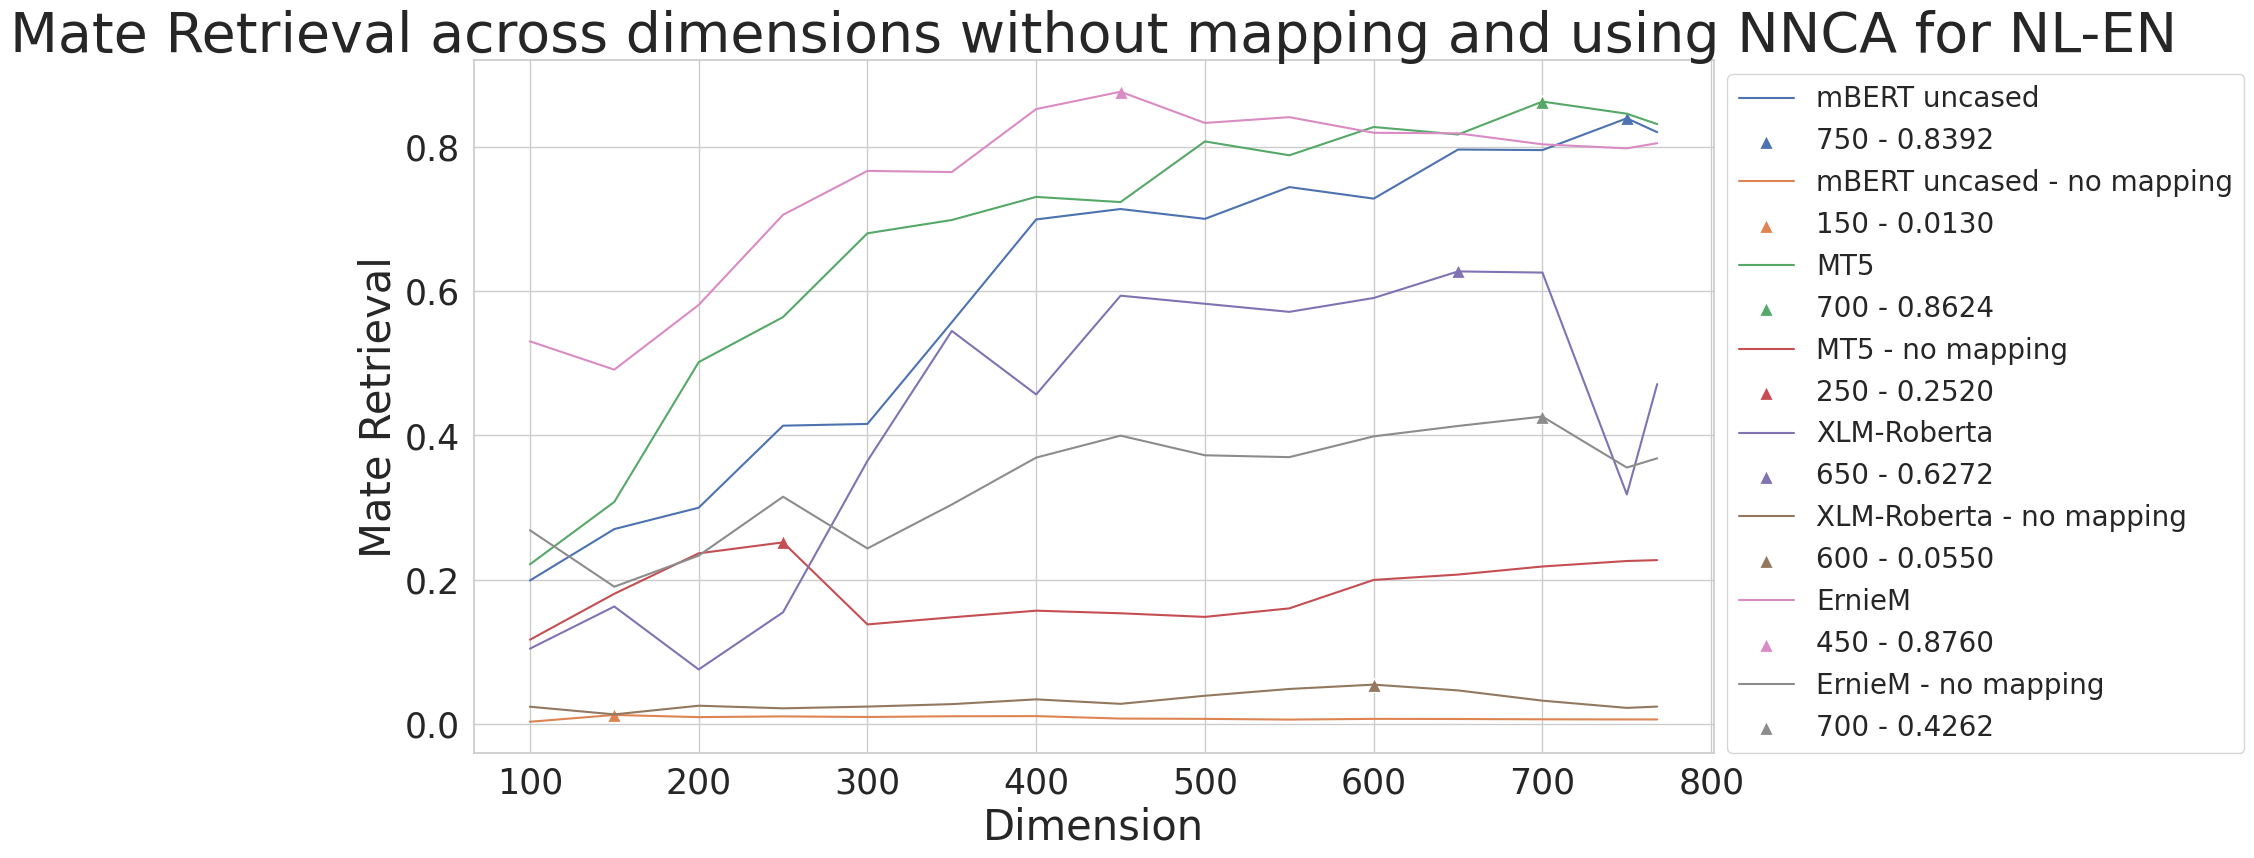

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  205613 MB |  205511 MB |
|       from large pool |  104378 KB |  420439 KB |  196480 MB |  196378 MB |
|       from small pool |       0 KB |    5432 KB |    9133 MB |    9133 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  205613 MB |  205511 MB |
|       from large pool |  104378 KB |  420439 KB |  196480 MB |

100%|██████████| 15/15 [00:03<00:00,  4.43it/s]


[0.9447999596595764, 0.008200000040233135] [700, 700]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  208179 MB |  208077 MB |
|       from large pool |  104378 KB |  420439 KB |  198889 MB |  198787 MB |
|       from small pool |       0 KB |    5432 KB |    9289 MB |    9289 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  208179 MB |  208077 MB |
|       fr

100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


[0.8959999680519104, 0.14919999241828918] [700, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  210745 MB |  210643 MB |
|       from large pool |  104378 KB |  420439 KB |  201299 MB |  201197 MB |
|       from small pool |       0 KB |    5432 KB |    9446 MB |    9446 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  210745 MB |  210643 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


[0.8887999653816223, 0.004999999888241291] [700, 100]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  213311 MB |  213209 MB |
|       from large pool |  104378 KB |  420439 KB |  203708 MB |  203606 MB |
|       from small pool |       0 KB |    5432 KB |    9602 MB |    9602 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  213311 MB |  213209 MB |
|       fr

100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


[0.9264000058174133, 0.026200000196695328] [550, 450]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  215877 MB |  215775 MB |
|       from large pool |  104378 KB |  420439 KB |  206118 MB |  206016 MB |
|       from small pool |       0 KB |    5432 KB |    9759 MB |    9759 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  215877 MB |  215775 MB |
|       fr

<Figure size 640x480 with 0 Axes>

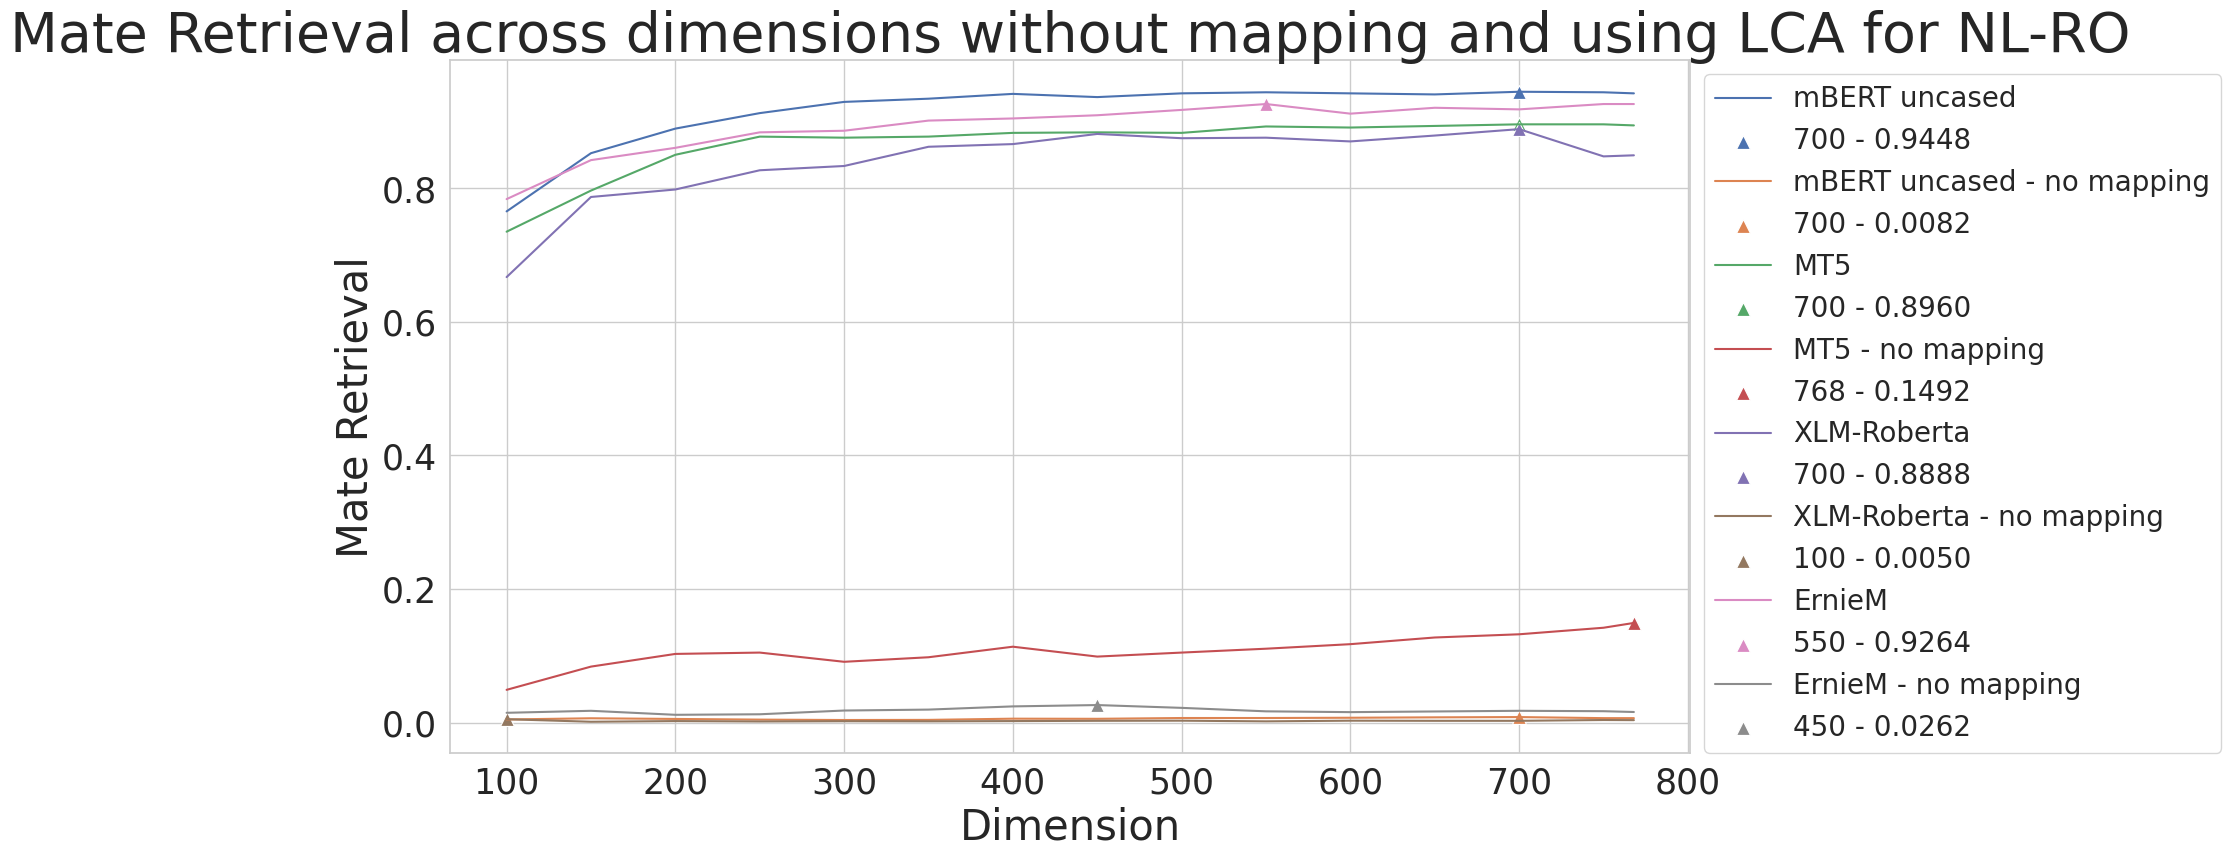

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [05:53<00:00, 23.55s/it]


[0.9271999597549438, 0.008200000040233135] [768, 700]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  221198 MB |  221096 MB |
|       from large pool |  104378 KB |  420439 KB |  211288 MB |  211186 MB |
|       from small pool |       0 KB |    5432 KB |    9909 MB |    9909 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  221198 MB |  221096 MB |
|       fr

100%|██████████| 15/15 [05:48<00:00, 23.21s/it]


[0.8967999815940857, 0.14919999241828918] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  226518 MB |  226417 MB |
|       from large pool |  104378 KB |  420439 KB |  216458 MB |  216356 MB |
|       from small pool |       0 KB |    5432 KB |   10060 MB |   10060 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  226518 MB |  226417 MB |
|       fro

100%|██████████| 15/15 [05:43<00:00, 22.90s/it]


[0.8759999871253967, 0.004999999888241291] [768, 100]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  231839 MB |  231737 MB |
|       from large pool |  104378 KB |  420439 KB |  221628 MB |  221527 MB |
|       from small pool |       0 KB |    5432 KB |   10210 MB |   10210 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  231839 MB |  231737 MB |
|       fr

100%|██████████| 15/15 [05:44<00:00, 22.94s/it]


[0.9047999978065491, 0.026200000196695328] [750, 450]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  237160 MB |  237058 MB |
|       from large pool |  104378 KB |  420439 KB |  226799 MB |  226697 MB |
|       from small pool |       0 KB |    5432 KB |   10361 MB |   10361 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  237160 MB |  237058 MB |
|       fr

<Figure size 640x480 with 0 Axes>

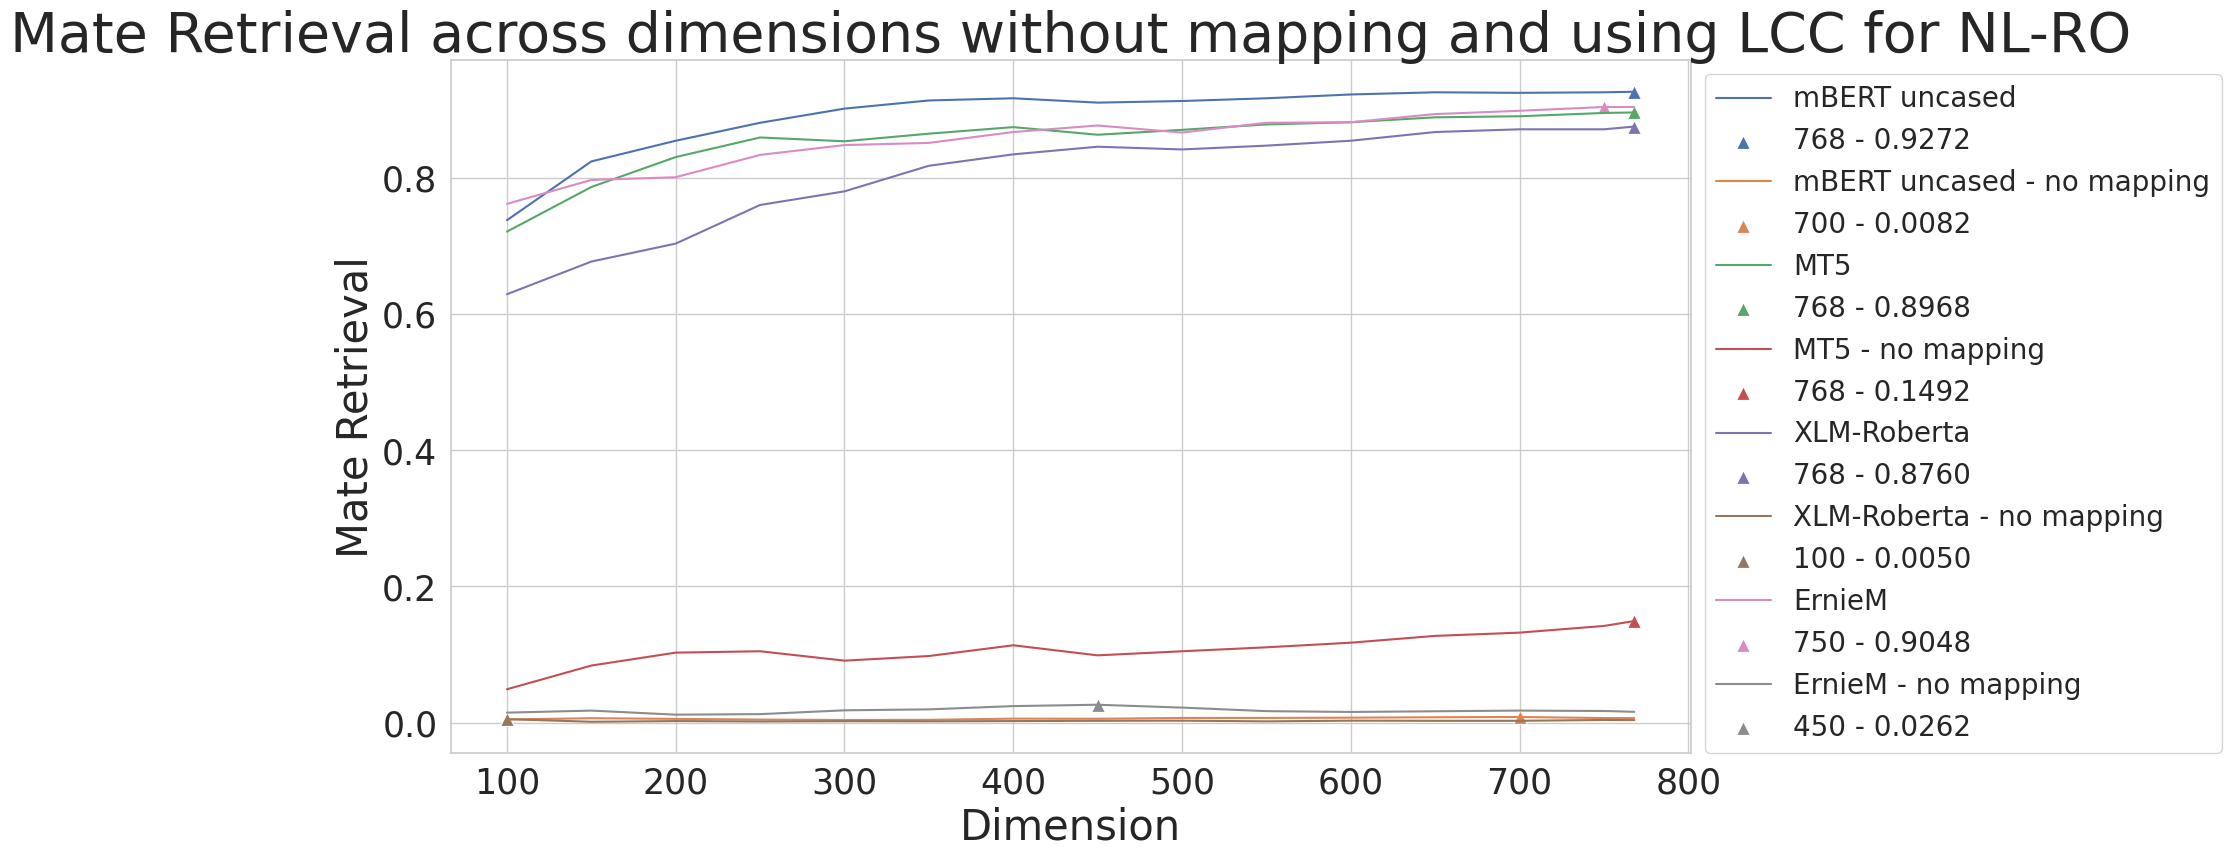

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               200400    
                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.3783999979496002 - 0.005799999926239252
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                 

 input_14 (InputLayer)       [(None, 750)]             0         
                                                                 
 dropout_26 (Dropout)        (None, 750)               0         
                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.41359999775886536 - 0.006599999964237213
Model: "model_42"
_________________________________________________________________
 Layer (type)   

40/40 [==============================] - 0s 3ms/step
150 - 0.19599999487400055 - 0.08379999548196793
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
__________________

 dense_17 (Dense)            (None, 500)               250500    
                                                                 
Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.31599998474121094 - 0.10480000078678131
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 100,600
Trainable params: 100,600
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
10

                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.48959997296333313 - 0.002199999988079071
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense

                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.10719999670982361 - 0.0037999998312443495
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_28 (Dr

 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 2ms/step
200 - 0.10719999670982361 - 0.011599999852478504
Model: "model_9"
_________________________________________________________________
 Layer (type)    

Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.25279998779296875 - 0.02199999988079071
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 550)               275550    
                 

<Figure size 640x480 with 0 Axes>

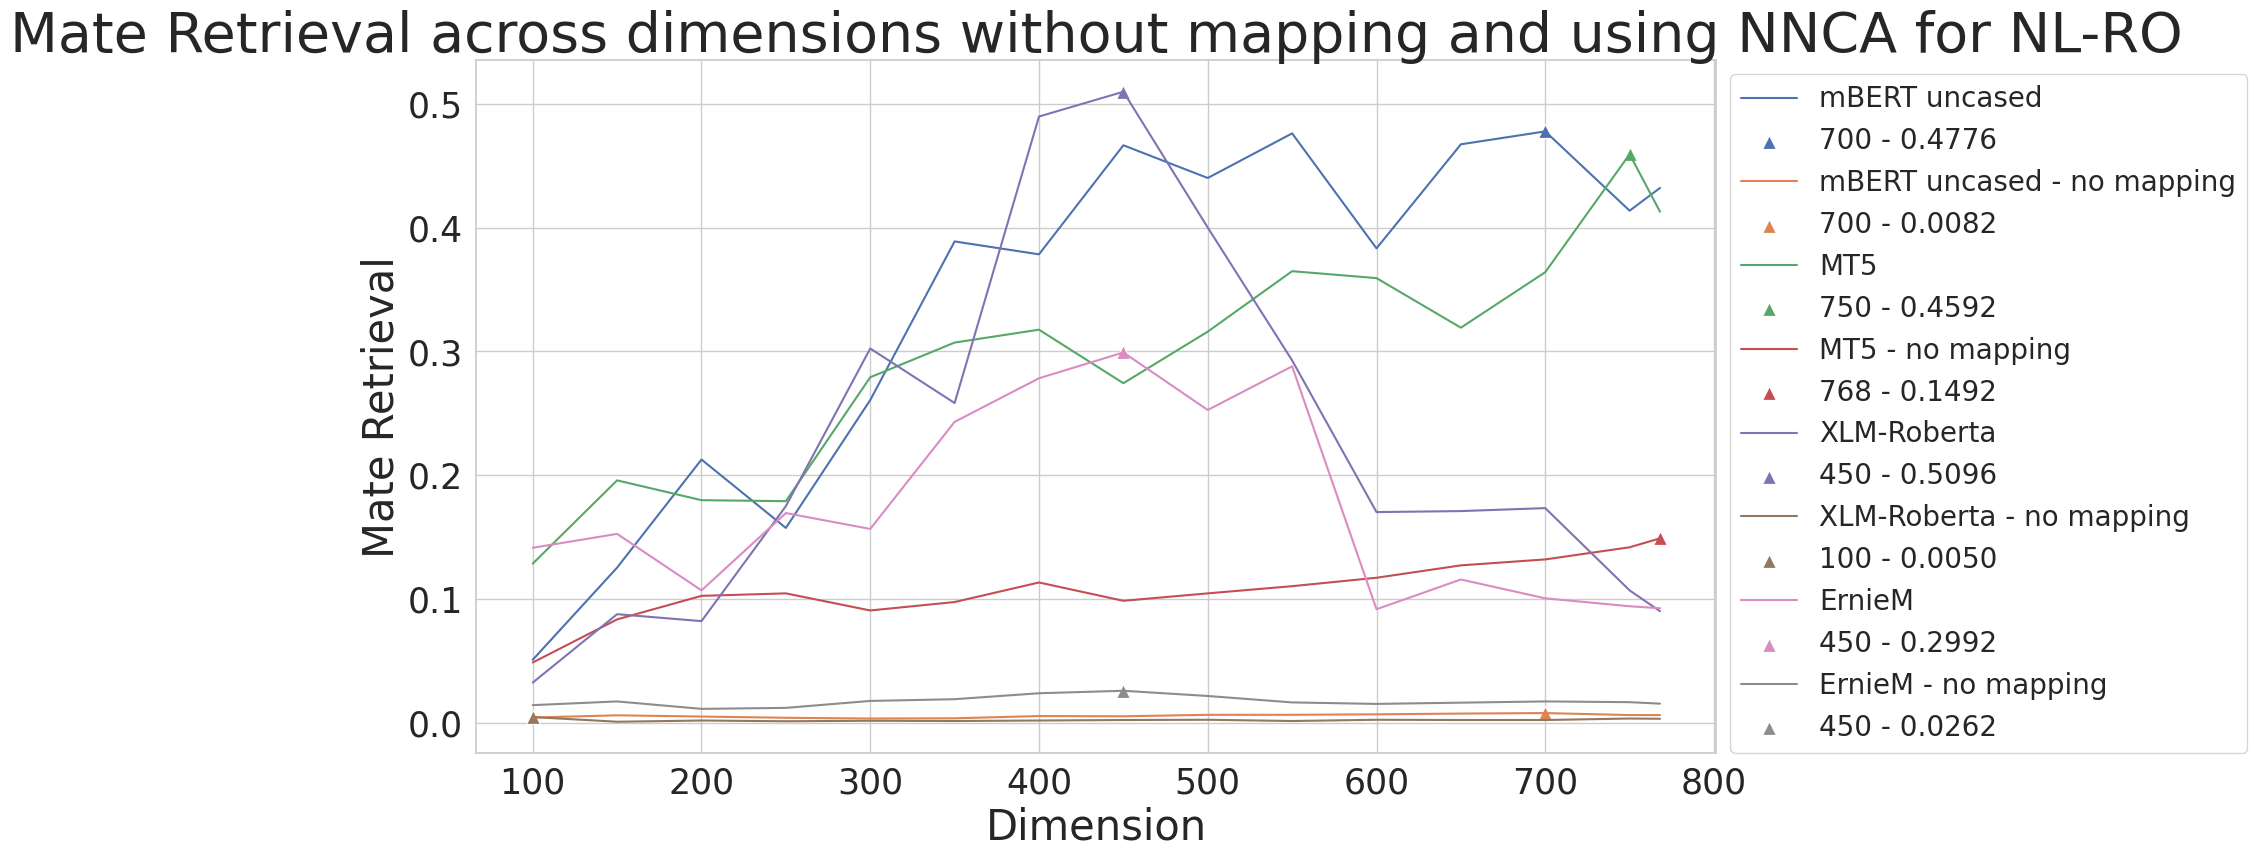

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  246293 MB |  246191 MB |
|       from large pool |  104378 KB |  420439 KB |  235361 MB |  235259 MB |
|       from small pool |       0 KB |    5432 KB |   10932 MB |   10932 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  246293 MB |  246191 MB |
|       from large pool |  104378 KB |  420439 KB |  235361 MB |

100%|██████████| 15/15 [00:03<00:00,  4.53it/s]


[0.9791999459266663, 0.17599999904632568] [400, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  248859 MB |  248757 MB |
|       from large pool |  104378 KB |  420439 KB |  237770 MB |  237668 MB |
|       from small pool |       0 KB |    5432 KB |   11088 MB |   11088 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  248859 MB |  248757 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  5.20it/s]


[0.9519999623298645, 0.5037999749183655] [750, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  251425 MB |  251323 MB |
|       from large pool |  104378 KB |  420439 KB |  240180 MB |  240078 MB |
|       from small pool |       0 KB |    5432 KB |   11245 MB |   11245 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  251425 MB |  251323 MB |
|       from

100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


[0.9687999486923218, 0.08020000159740448] [700, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  253991 MB |  253889 MB |
|       from large pool |  104378 KB |  420439 KB |  242589 MB |  242487 MB |
|       from small pool |       0 KB |    5432 KB |   11401 MB |   11401 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  253991 MB |  253889 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


[0.983199954032898, 0.6557999849319458] [700, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  256557 MB |  256455 MB |
|       from large pool |  104378 KB |  420439 KB |  244999 MB |  244897 MB |
|       from small pool |       0 KB |    5432 KB |   11558 MB |   11558 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  256557 MB |  256455 MB |
|       from 

<Figure size 640x480 with 0 Axes>

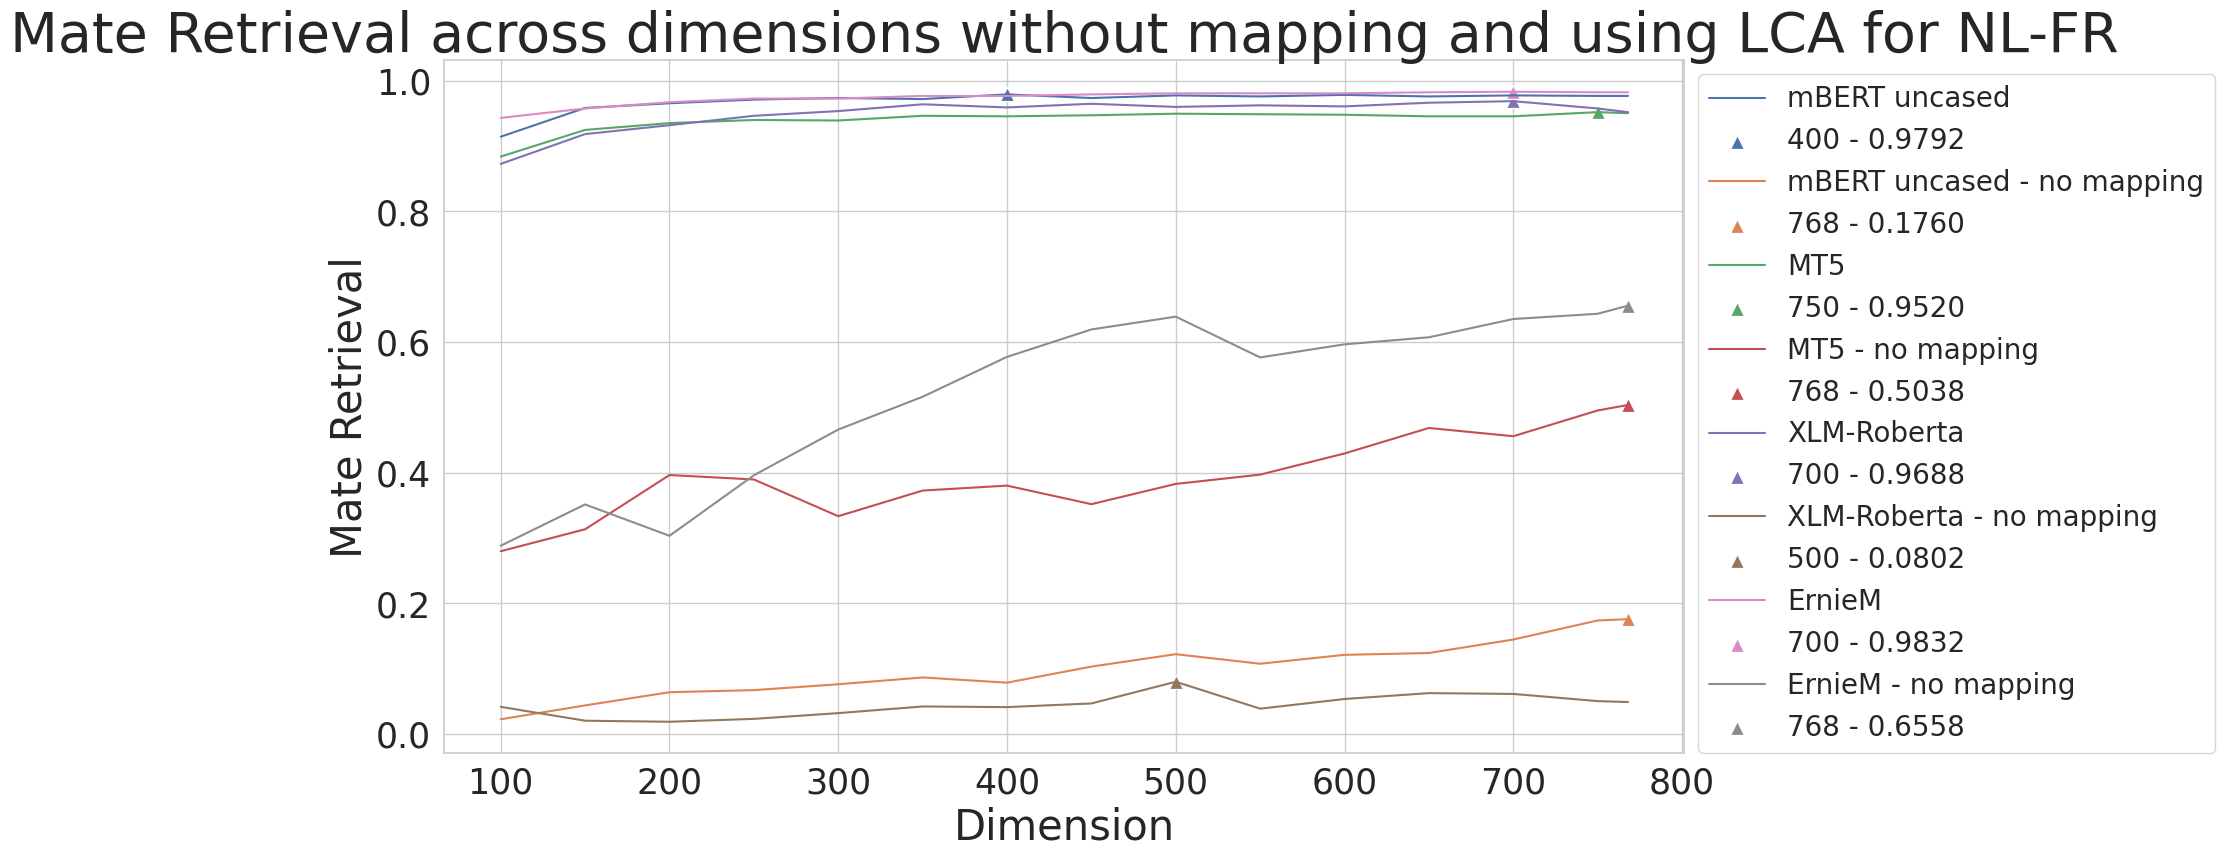

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [05:49<00:00, 23.31s/it]


[0.9775999784469604, 0.17599999904632568] [600, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  261878 MB |  261776 MB |
|       from large pool |  104378 KB |  420439 KB |  250169 MB |  250067 MB |
|       from small pool |       0 KB |    5432 KB |   11708 MB |   11708 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  261878 MB |  261776 MB |
|       fro

100%|██████████| 15/15 [05:45<00:00, 23.06s/it]


[0.9431999921798706, 0.5037999749183655] [550, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  267199 MB |  267097 MB |
|       from large pool |  104378 KB |  420439 KB |  255339 MB |  255237 MB |
|       from small pool |       0 KB |    5432 KB |   11859 MB |   11859 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  267199 MB |  267097 MB |
|       from

100%|██████████| 15/15 [05:50<00:00, 23.34s/it]


[0.9655999541282654, 0.08020000159740448] [750, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  272519 MB |  272417 MB |
|       from large pool |  104378 KB |  420439 KB |  260509 MB |  260408 MB |
|       from small pool |       0 KB |    5432 KB |   12009 MB |   12009 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  272519 MB |  272417 MB |
|       fro

100%|██████████| 15/15 [05:52<00:00, 23.50s/it]


[0.9815999865531921, 0.6557999849319458] [450, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  277840 MB |  277738 MB |
|       from large pool |  104378 KB |  420439 KB |  265680 MB |  265578 MB |
|       from small pool |       0 KB |    5432 KB |   12160 MB |   12160 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  277840 MB |  277738 MB |
|       from

<Figure size 640x480 with 0 Axes>

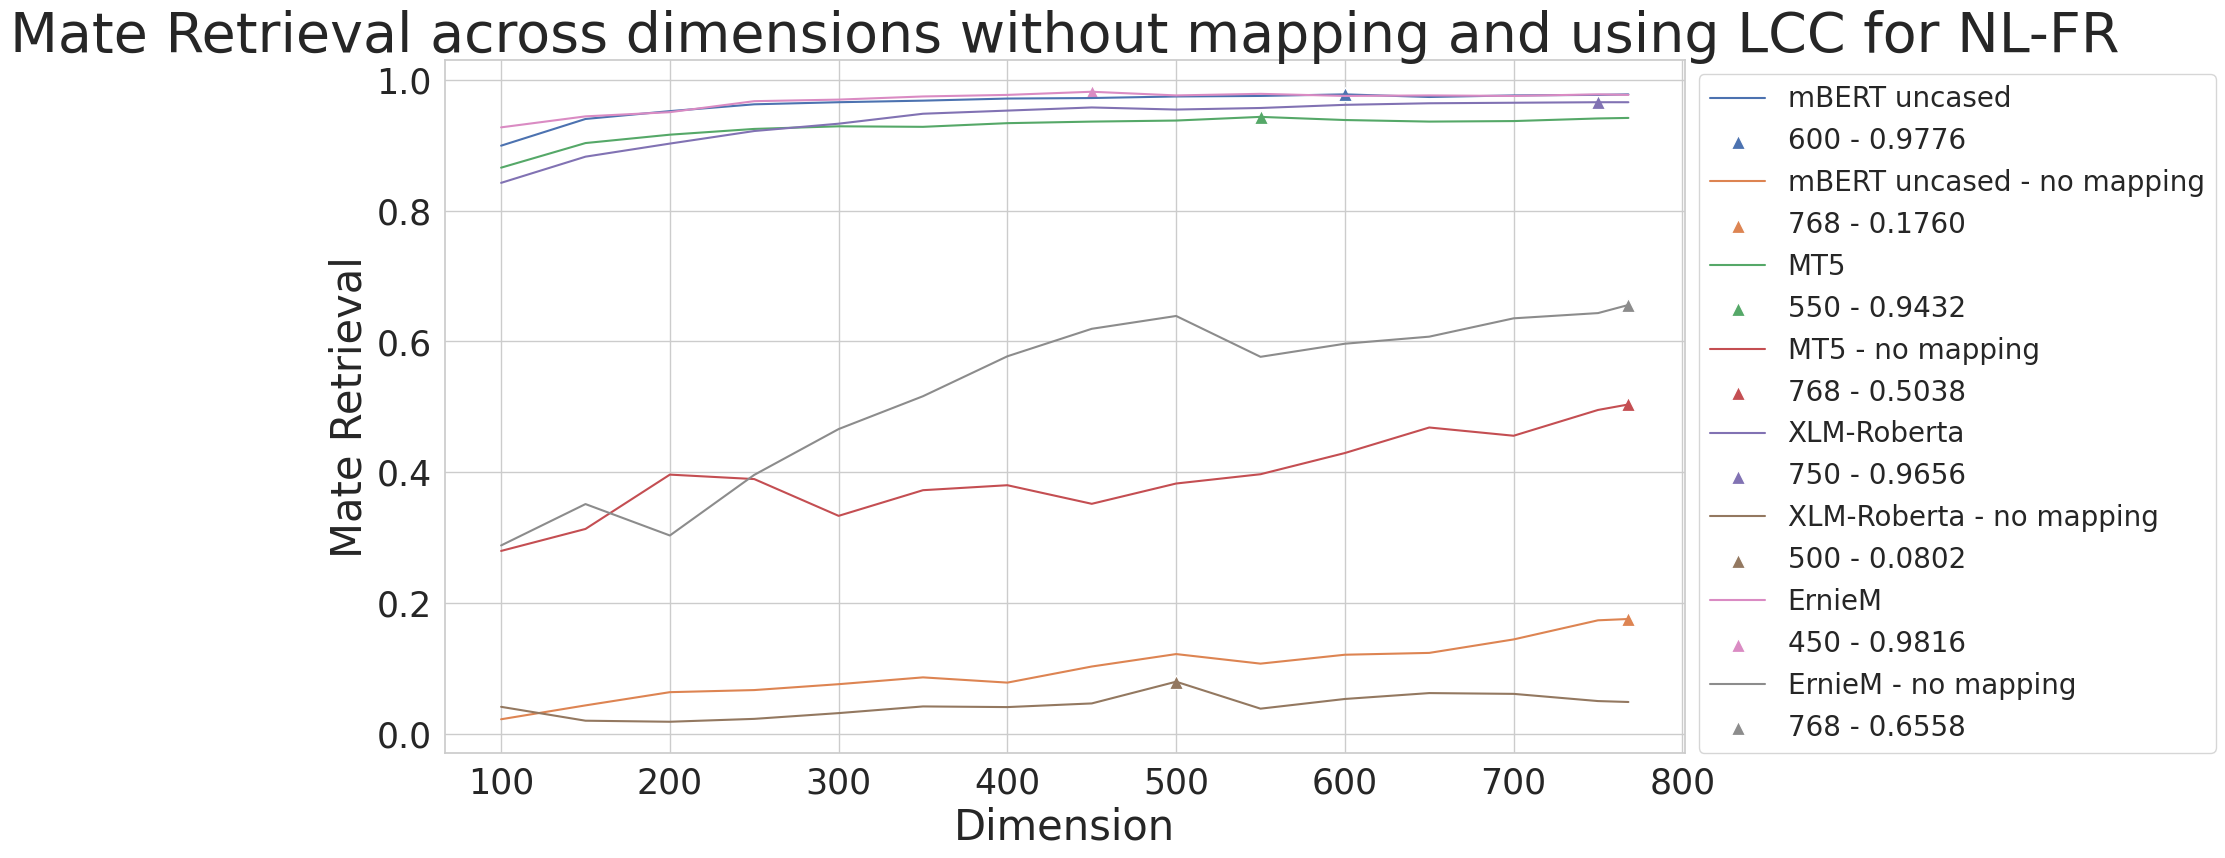

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               200400    
                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 2ms/step
400 - 0.7759999632835388 - 0.07880000025033951
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                  

 input_14 (InputLayer)       [(None, 750)]             0         
                                                                 
 dropout_26 (Dropout)        (None, 750)               0         
                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.8287999629974365 - 0.17399999499320984
Model: "model_42"
_________________________________________________________________
 Layer (type)     

40/40 [==============================] - 0s 3ms/step
150 - 0.6200000047683716 - 0.31360000371932983
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
___________________

 dense_17 (Dense)            (None, 500)               250500    
                                                                 
Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 2ms/step
500 - 0.8687999844551086 - 0.382999986410141
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 100,600
Trainable params: 100,600
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 2ms/step
10

                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.3831999897956848 - 0.0414000004529953
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense)  

                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.4487999975681305 - 0.050599999725818634
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_28 (Drop

 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
200 - 0.7360000014305115 - 0.3035999834537506
Model: "model_9"
_________________________________________________________________
 Layer (type)       

Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.8351999521255493 - 0.6389999985694885
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 550)               275550    
                                         

<Figure size 640x480 with 0 Axes>

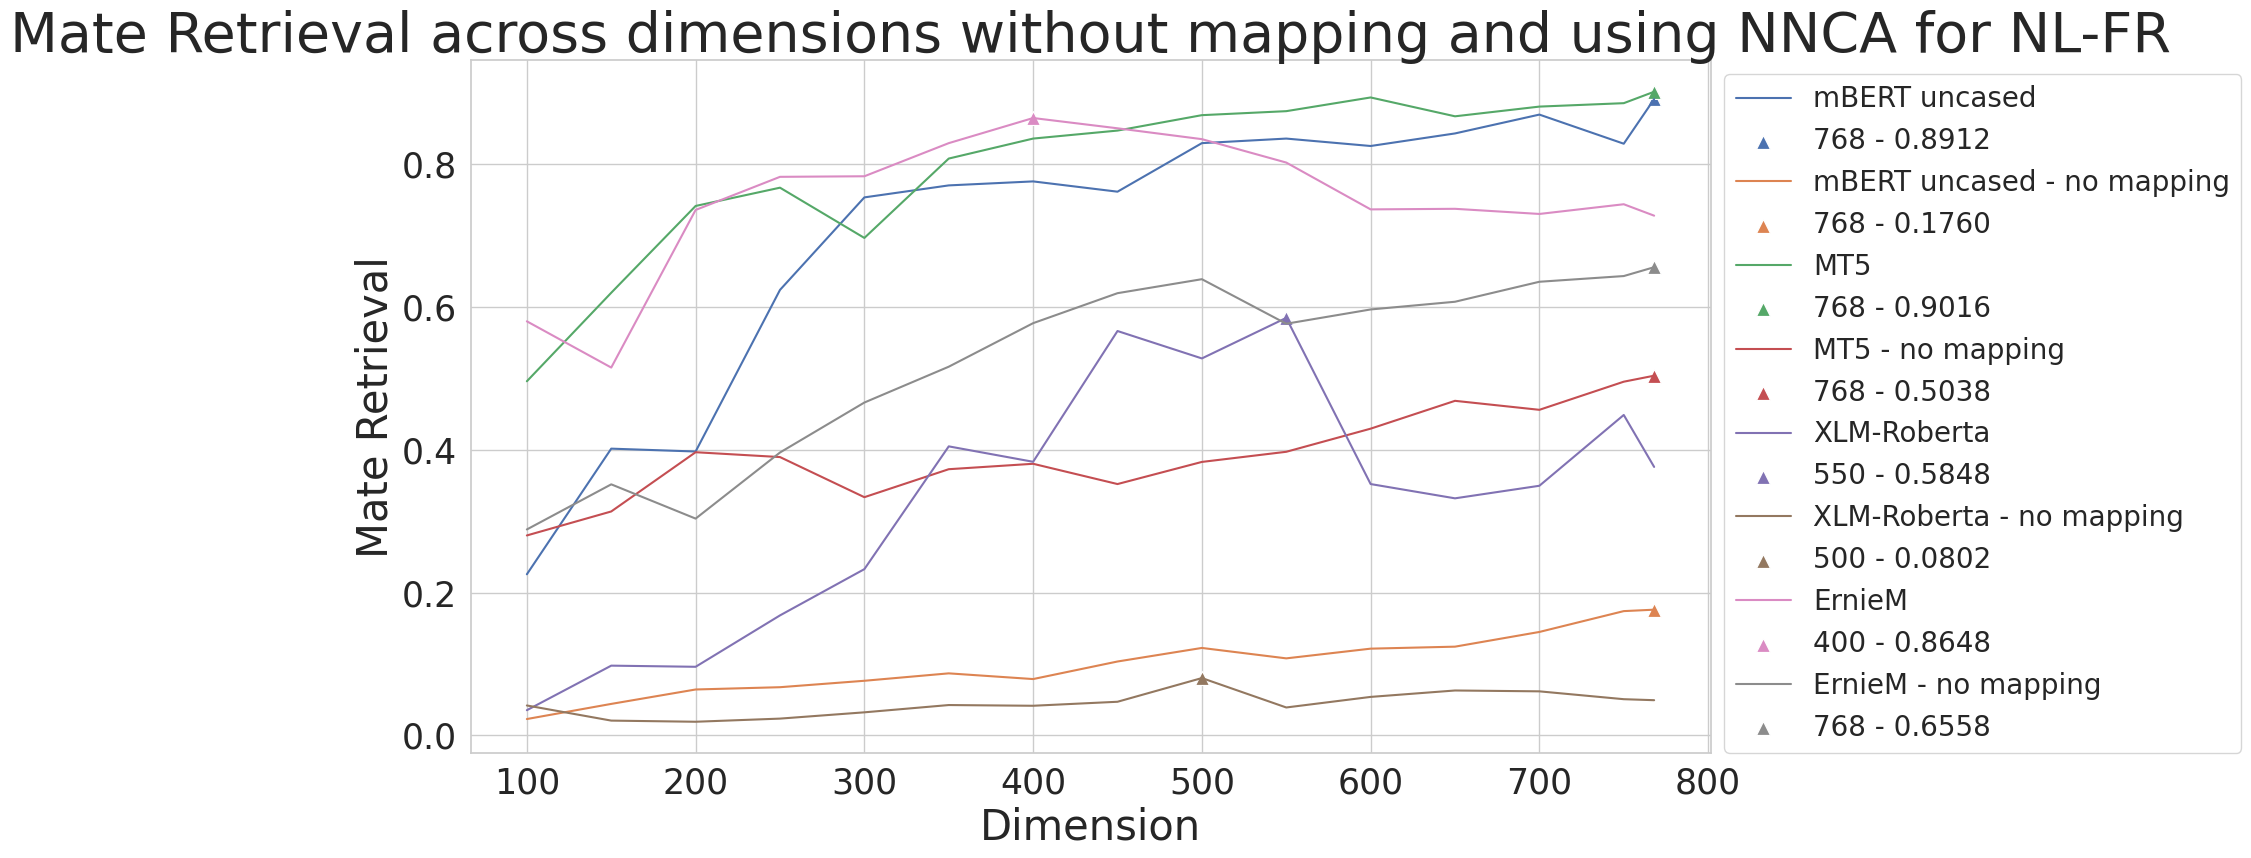

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  286973 MB |  286871 MB |
|       from large pool |  104378 KB |  420439 KB |  274242 MB |  274140 MB |
|       from small pool |       0 KB |    5432 KB |   12731 MB |   12731 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  286973 MB |  286871 MB |
|       from large pool |  104378 KB |  420439 KB |  274242 MB |

100%|██████████| 15/15 [00:03<00:00,  4.45it/s]


[0.9791999459266663, 0.14100000262260437] [550, 750]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  289539 MB |  289437 MB |
|       from large pool |  104378 KB |  420439 KB |  276651 MB |  276549 MB |
|       from small pool |       0 KB |    5432 KB |   12887 MB |   12887 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  289539 MB |  289437 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


[0.9519999623298645, 0.5785999894142151] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  292105 MB |  292003 MB |
|       from large pool |  104378 KB |  420439 KB |  279061 MB |  278959 MB |
|       from small pool |       0 KB |    5432 KB |   13044 MB |   13044 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  292105 MB |  292003 MB |
|       from

100%|██████████| 15/15 [00:02<00:00,  5.37it/s]


[0.9535999894142151, 0.24979999661445618] [600, 700]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  294671 MB |  294569 MB |
|       from large pool |  104378 KB |  420439 KB |  281470 MB |  281368 MB |
|       from small pool |       0 KB |    5432 KB |   13200 MB |   13200 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  294671 MB |  294569 MB |
|       fro

100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


[0.9799999594688416, 0.6656000018119812] [700, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  297237 MB |  297135 MB |
|       from large pool |  104378 KB |  420439 KB |  283880 MB |  283778 MB |
|       from small pool |       0 KB |    5432 KB |   13357 MB |   13357 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  297237 MB |  297135 MB |
|       from

<Figure size 640x480 with 0 Axes>

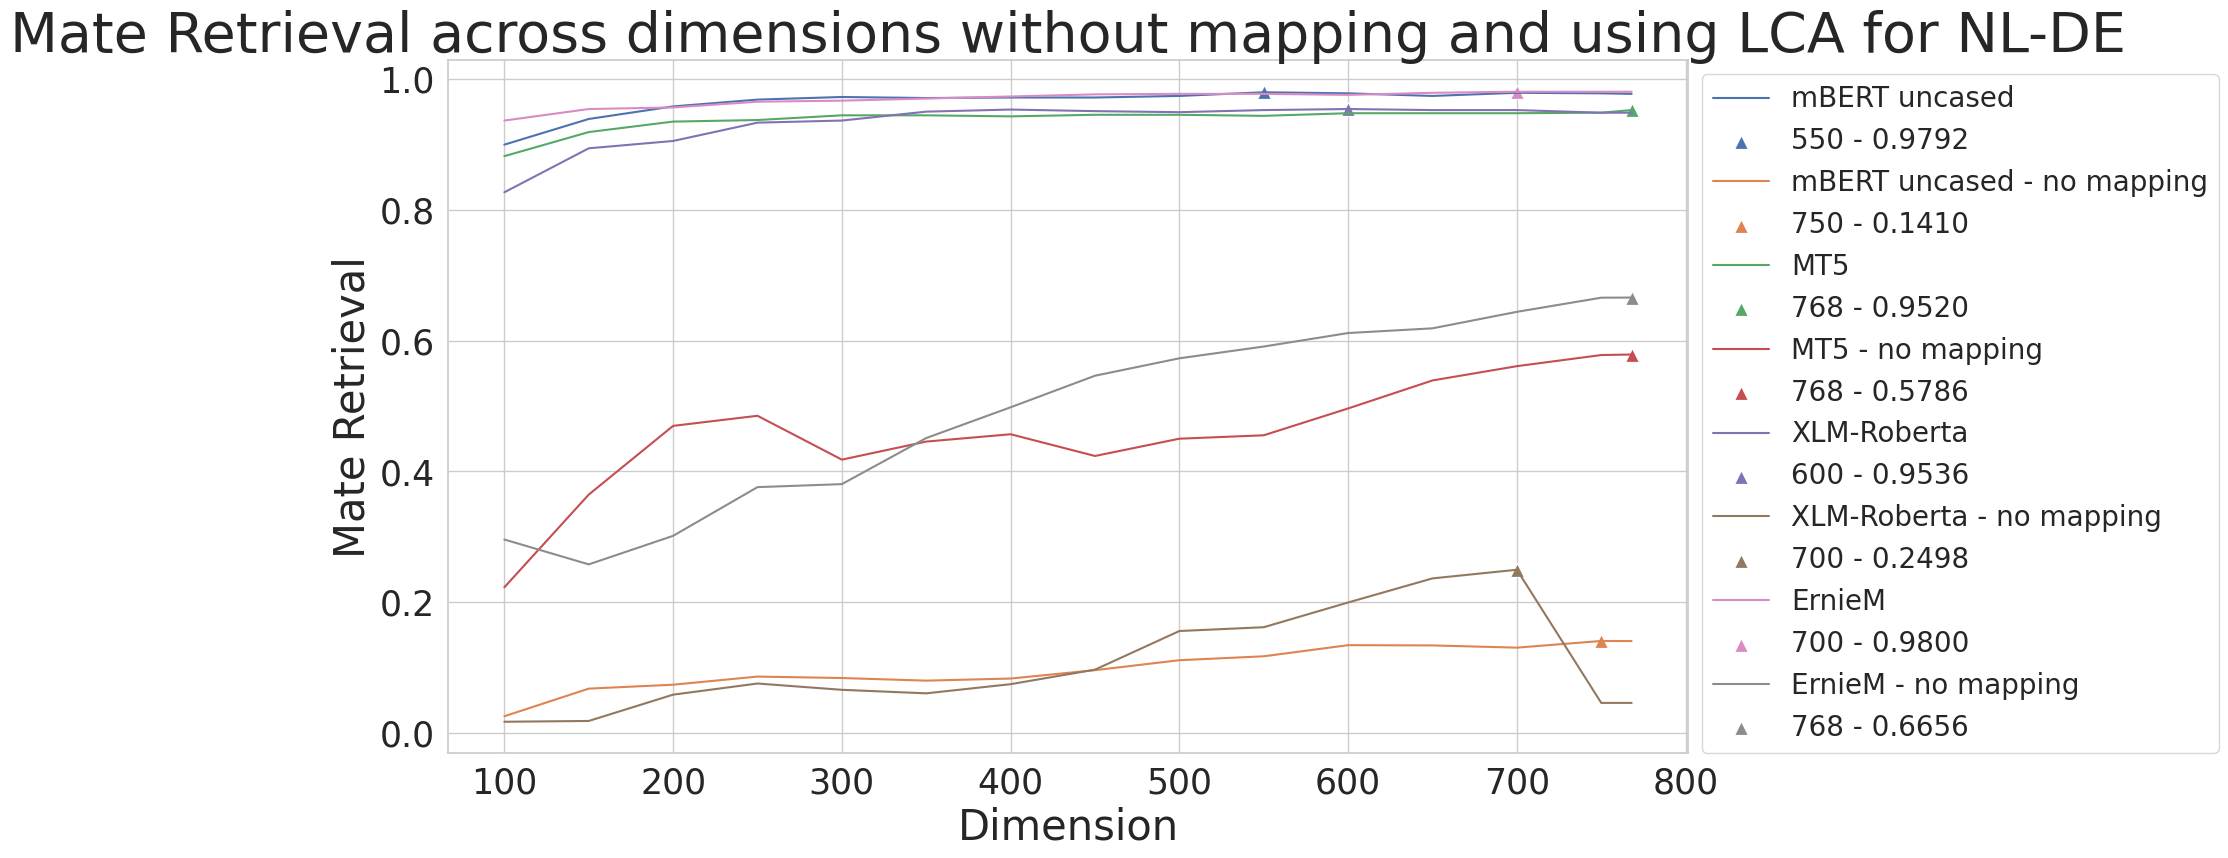

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [05:44<00:00, 22.94s/it]


[0.9711999893188477, 0.14100000262260437] [550, 750]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  302558 MB |  302456 MB |
|       from large pool |  104378 KB |  420439 KB |  289050 MB |  288948 MB |
|       from small pool |       0 KB |    5432 KB |   13507 MB |   13507 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  302558 MB |  302456 MB |
|       fro

100%|██████████| 15/15 [05:44<00:00, 22.99s/it]


[0.9391999840736389, 0.5785999894142151] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  307879 MB |  307777 MB |
|       from large pool |  104378 KB |  420439 KB |  294220 MB |  294118 MB |
|       from small pool |       0 KB |    5432 KB |   13658 MB |   13658 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  307879 MB |  307777 MB |
|       from

100%|██████████| 15/15 [05:42<00:00, 22.86s/it]


[0.9575999975204468, 0.24979999661445618] [700, 700]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  313200 MB |  313098 MB |
|       from large pool |  104378 KB |  420439 KB |  299391 MB |  299289 MB |
|       from small pool |       0 KB |    5432 KB |   13808 MB |   13808 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  313200 MB |  313098 MB |
|       fro

100%|██████████| 15/15 [05:39<00:00, 22.66s/it]


[0.9783999919891357, 0.6656000018119812] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  318520 MB |  318418 MB |
|       from large pool |  104378 KB |  420439 KB |  304561 MB |  304459 MB |
|       from small pool |       0 KB |    5432 KB |   13959 MB |   13959 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  318520 MB |  318418 MB |
|       from

<Figure size 640x480 with 0 Axes>

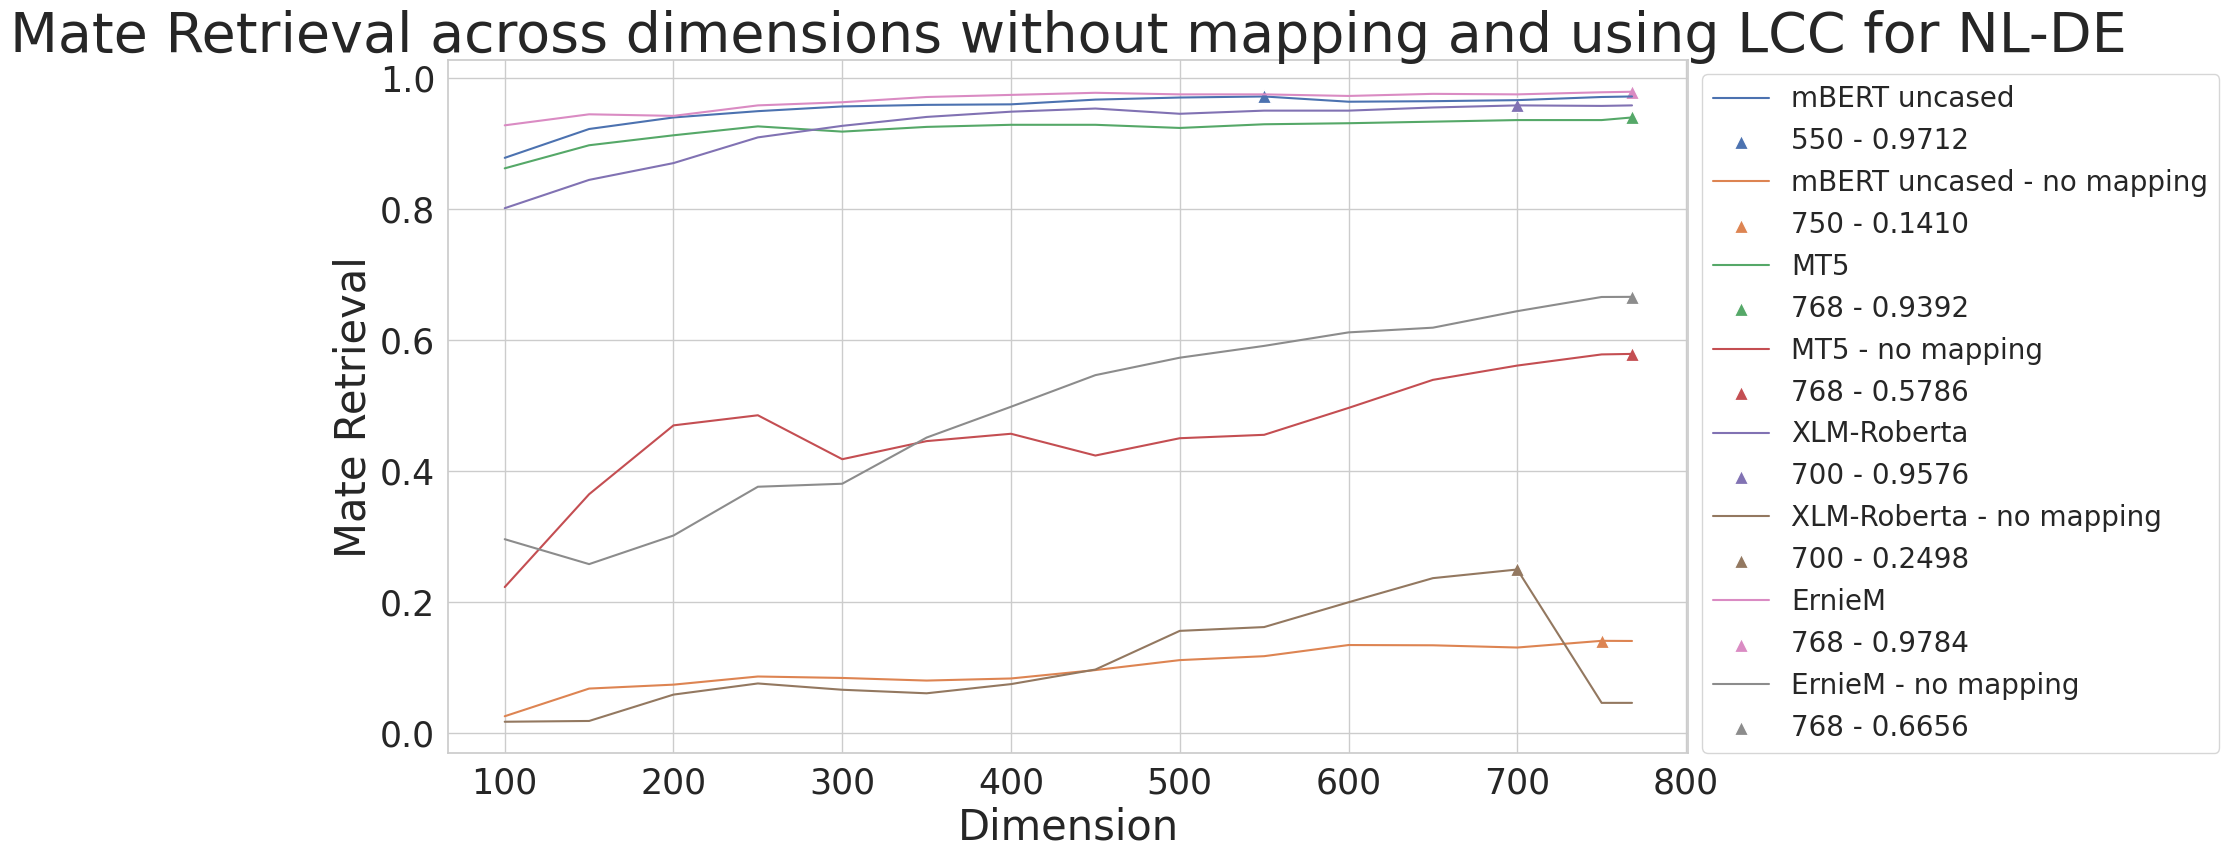

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               200400    
                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.8071999549865723 - 0.0835999995470047
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                   

 input_14 (InputLayer)       [(None, 750)]             0         
                                                                 
 dropout_26 (Dropout)        (None, 750)               0         
                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.9192000031471252 - 0.14100000262260437
Model: "model_42"
_________________________________________________________________
 Layer (type)     

40/40 [==============================] - 0s 3ms/step
150 - 0.6159999966621399 - 0.3646000027656555
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
____________________

 dense_17 (Dense)            (None, 500)               250500    
                                                                 
Total params: 501,000
Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.8343999981880188 - 0.44999998807907104
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                  

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 100,600
Trainable params: 100,600
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
10

                                                                 
Total params: 400,900
Trainable params: 400,900
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
400 - 0.7008000016212463 - 0.07499999552965164
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 450)]             0         
                                                                 
 dropout_14 (Dropout)        (None, 450)               0         
                                                                 
 dense_14 (Dense)            (None, 500)               225500    
                                                                 
 dropout_15 (Dropout)        (None, 500)               0         
                                                                 
 dense_15 (Dense) 

                                                                 
 dense_26 (Dense)            (None, 500)               375500    
                                                                 
 dropout_27 (Dropout)        (None, 500)               0         
                                                                 
 dense_27 (Dense)            (None, 750)               375750    
                                                                 
Total params: 751,250
Trainable params: 751,250
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
750 - 0.30079999566078186 - 0.04639999940991402
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 768)]             0         
                                                                 
 dropout_28 (Drop

 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
Total params: 200,700
Trainable params: 200,700
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
200 - 0.5848000049591064 - 0.30159997940063477
Model: "model_9"
_________________________________________________________________
 Layer (type)      

Trainable params: 501,000
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 3ms/step
500 - 0.8384000062942505 - 0.5727999806404114
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 550)]             0         
                                                                 
 dropout_18 (Dropout)        (None, 550)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               275500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 550)               275550    
                                         

<Figure size 640x480 with 0 Axes>

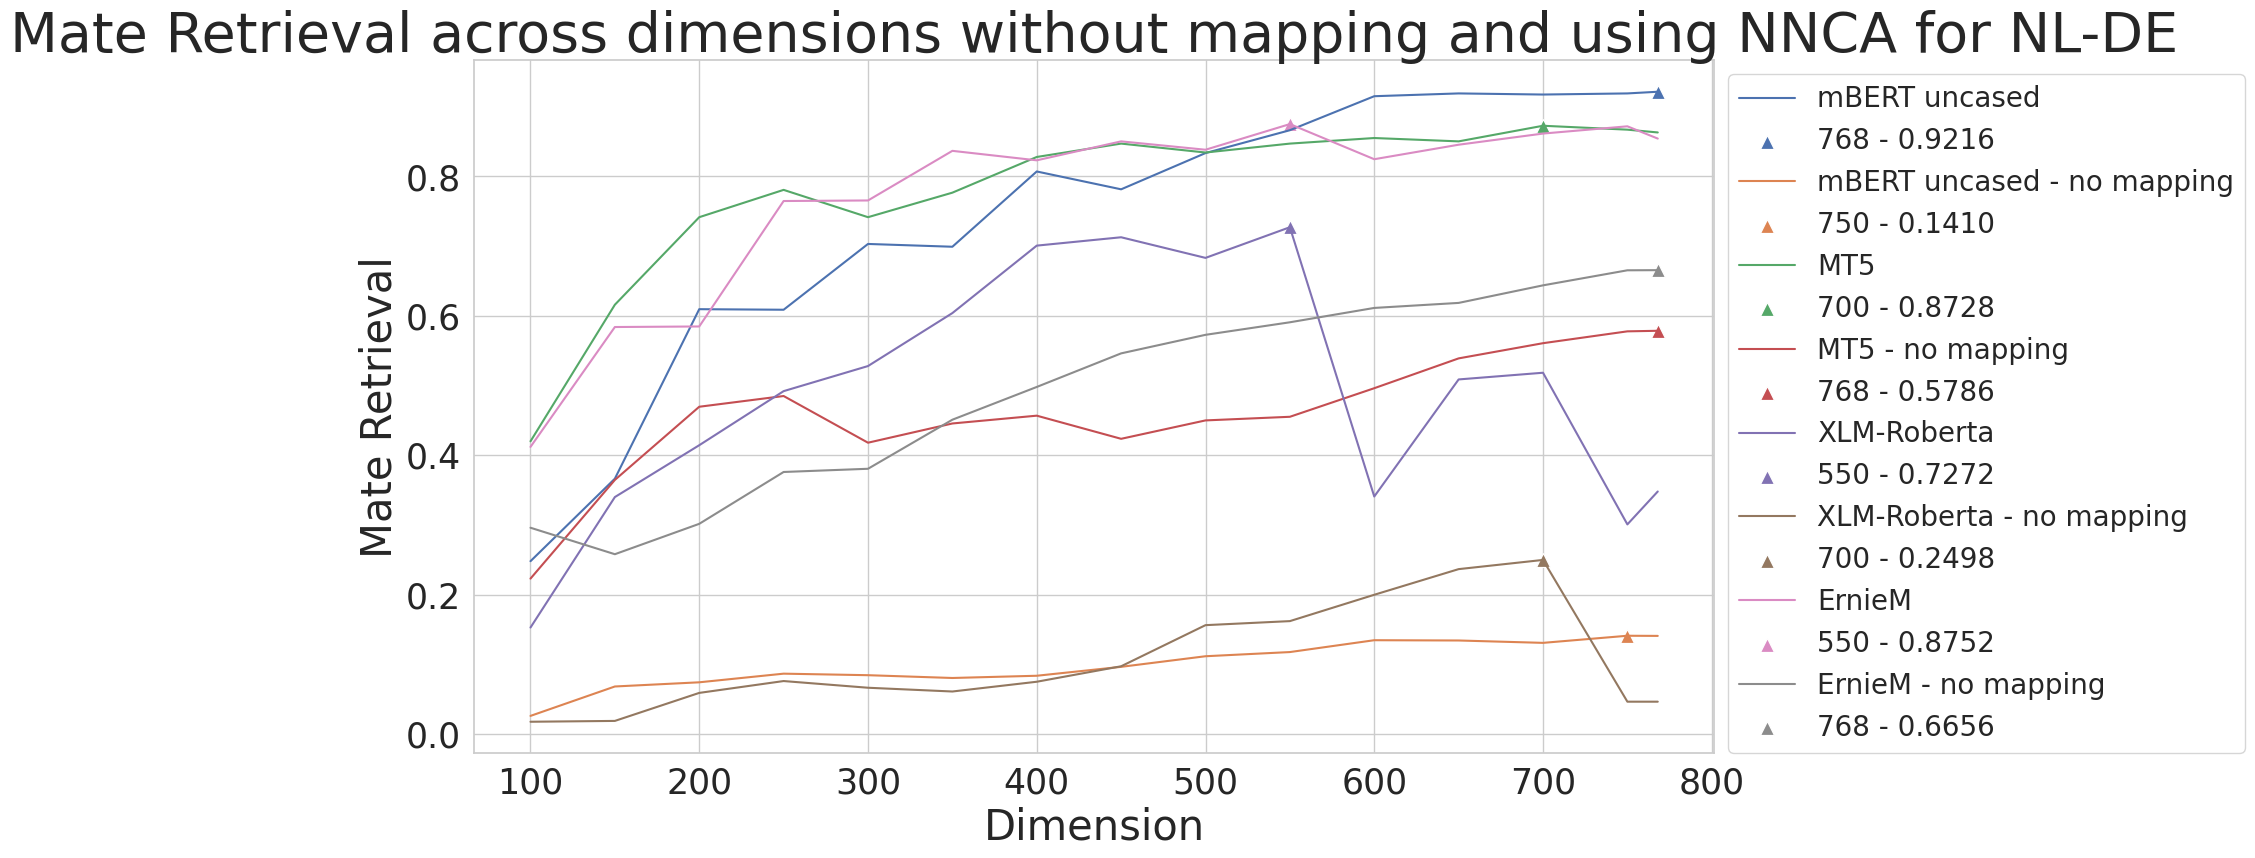

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  327653 MB |  327551 MB |
|       from large pool |  104378 KB |  420439 KB |  313123 MB |  313021 MB |
|       from small pool |       0 KB |    5432 KB |   14530 MB |   14530 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  327653 MB |  327551 MB |
|       from large pool |  104378 KB |  420439 KB |  313123 MB |

100%|██████████| 15/15 [00:04<00:00,  3.20it/s]


[0.978290594577124, 0.05493122677551682] [600, 300]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  328487 MB |  328385 MB |
|       from large pool |  104378 KB |  420439 KB |  313941 MB |  313839 MB |
|       from small pool |       0 KB |    5432 KB |   14545 MB |   14545 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  328487 MB |  328385 MB |
|       from

100%|██████████| 15/15 [00:03<00:00,  3.77it/s]


[0.9601708446549415, 0.4303317691744456] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  329321 MB |  329219 MB |
|       from large pool |  104378 KB |  420439 KB |  314760 MB |  314658 MB |
|       from small pool |       0 KB |    5432 KB |   14561 MB |   14561 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  329321 MB |  329219 MB |
|       from

100%|██████████| 15/15 [00:05<00:00,  2.99it/s]


[0.9615999333343445, 0.10122715622203518] [700, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  330155 MB |  330053 MB |
|       from large pool |  104378 KB |  420439 KB |  315578 MB |  315476 MB |
|       from small pool |       0 KB |    5432 KB |   14576 MB |   14576 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  330155 MB |  330053 MB |
|       fro

100%|██████████| 15/15 [00:04<00:00,  3.46it/s]


[0.9717785009407868, 0.1829728340930525] [650, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  330989 MB |  330887 MB |
|       from large pool |  104378 KB |  420439 KB |  316397 MB |  316295 MB |
|       from small pool |       0 KB |    5432 KB |   14592 MB |   14592 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  330989 MB |  330887 MB |
|       from

<Figure size 640x480 with 0 Axes>

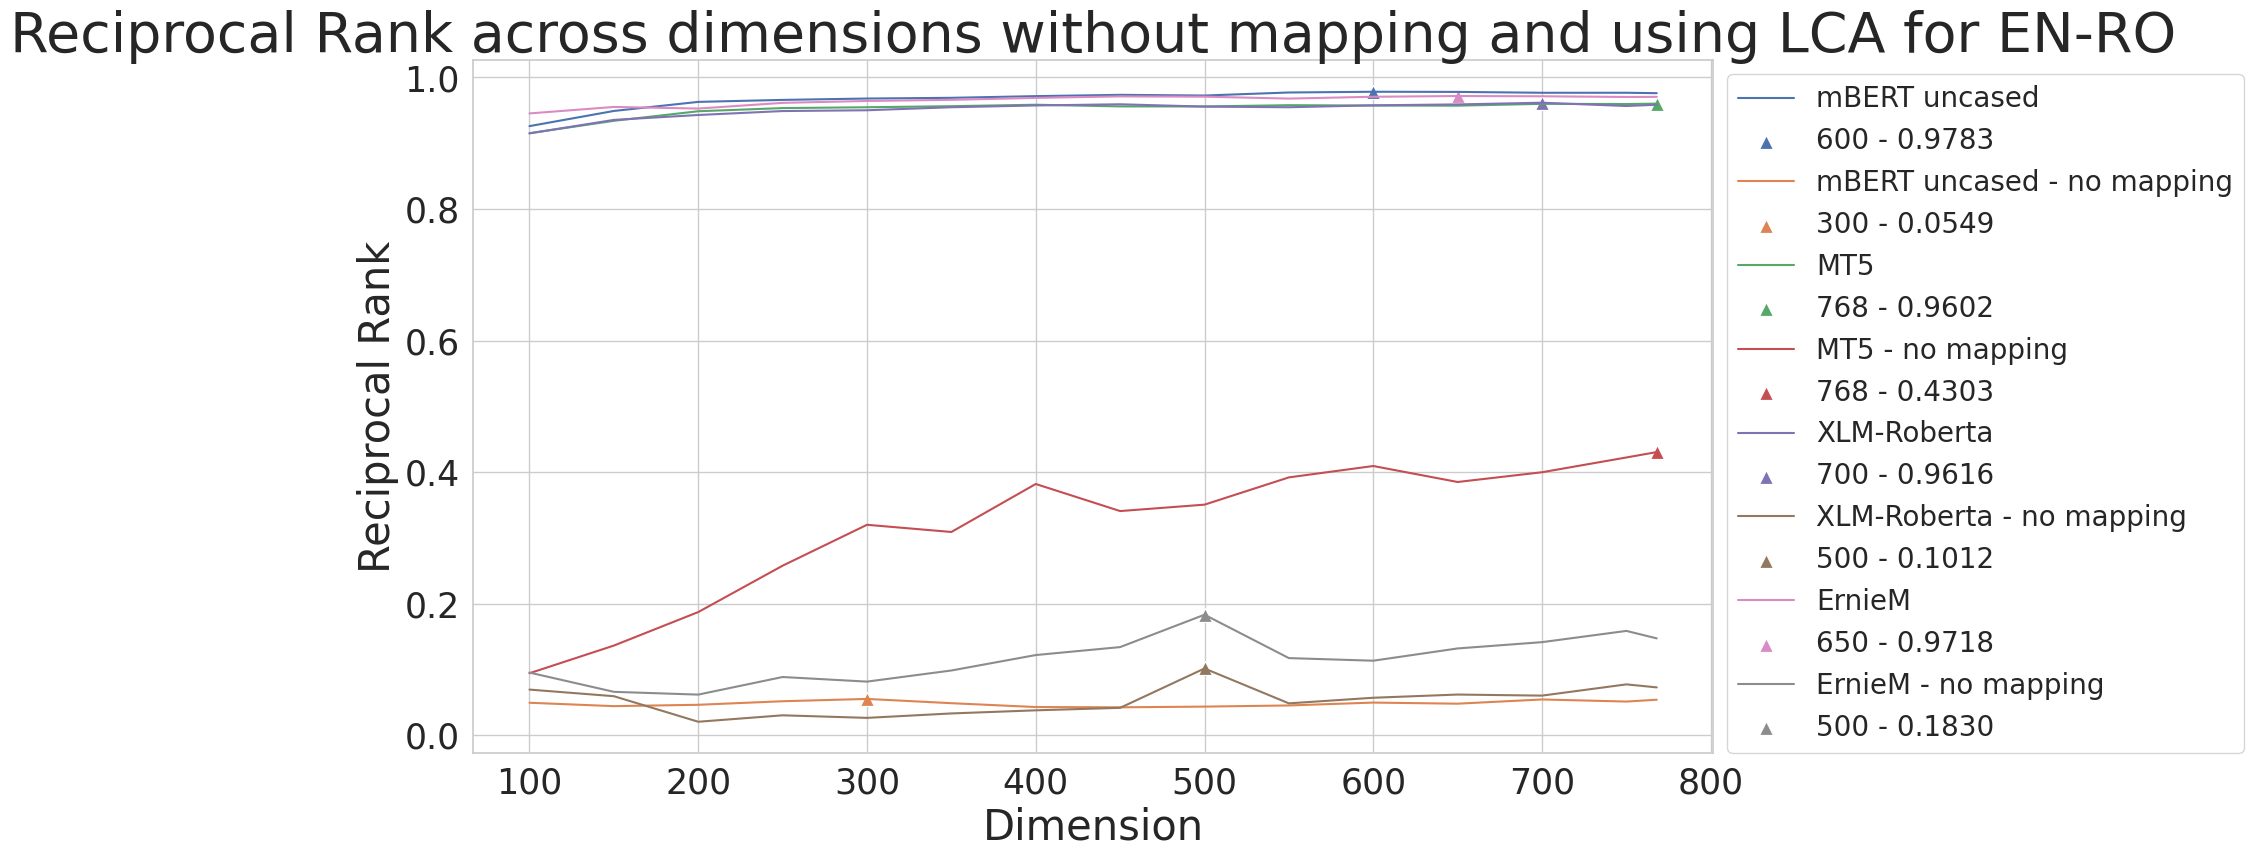

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])


100%|██████████| 15/15 [06:04<00:00, 24.32s/it]


[0.9747869493219198, 0.05493122677551682] [768, 300]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  334018 MB |  333916 MB |
|       from large pool |  104378 KB |  420439 KB |  319414 MB |  319312 MB |
|       from small pool |       0 KB |    5432 KB |   14603 MB |   14603 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  334018 MB |  333916 MB |
|       fro

100%|██████████| 15/15 [05:47<00:00, 23.18s/it]


[0.9555222643215908, 0.4303317691744456] [768, 768]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  337047 MB |  336945 MB |
|       from large pool |  104378 KB |  420439 KB |  322432 MB |  322330 MB |
|       from small pool |       0 KB |    5432 KB |   14615 MB |   14615 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  337047 MB |  336945 MB |
|       from

100%|██████████| 15/15 [05:47<00:00, 23.20s/it]


[0.9622757071615786, 0.10122715622203518] [768, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  340076 MB |  339974 MB |
|       from large pool |  104378 KB |  420439 KB |  325449 MB |  325347 MB |
|       from small pool |       0 KB |    5432 KB |   14626 MB |   14626 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  340076 MB |  339974 MB |
|       fro

100%|██████████| 15/15 [05:46<00:00, 23.09s/it]


[0.9718166982600487, 0.1829728340930525] [768, 500]
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  104378 KB |  420439 KB |  343105 MB |  343003 MB |
|       from large pool |  104378 KB |  420439 KB |  328467 MB |  328365 MB |
|       from small pool |       0 KB |    5432 KB |   14638 MB |   14638 MB |
|---------------------------------------------------------------------------|
| Active memory         |  104378 KB |  420439 KB |  343105 MB |  343003 MB |
|       from

<Figure size 640x480 with 0 Axes>

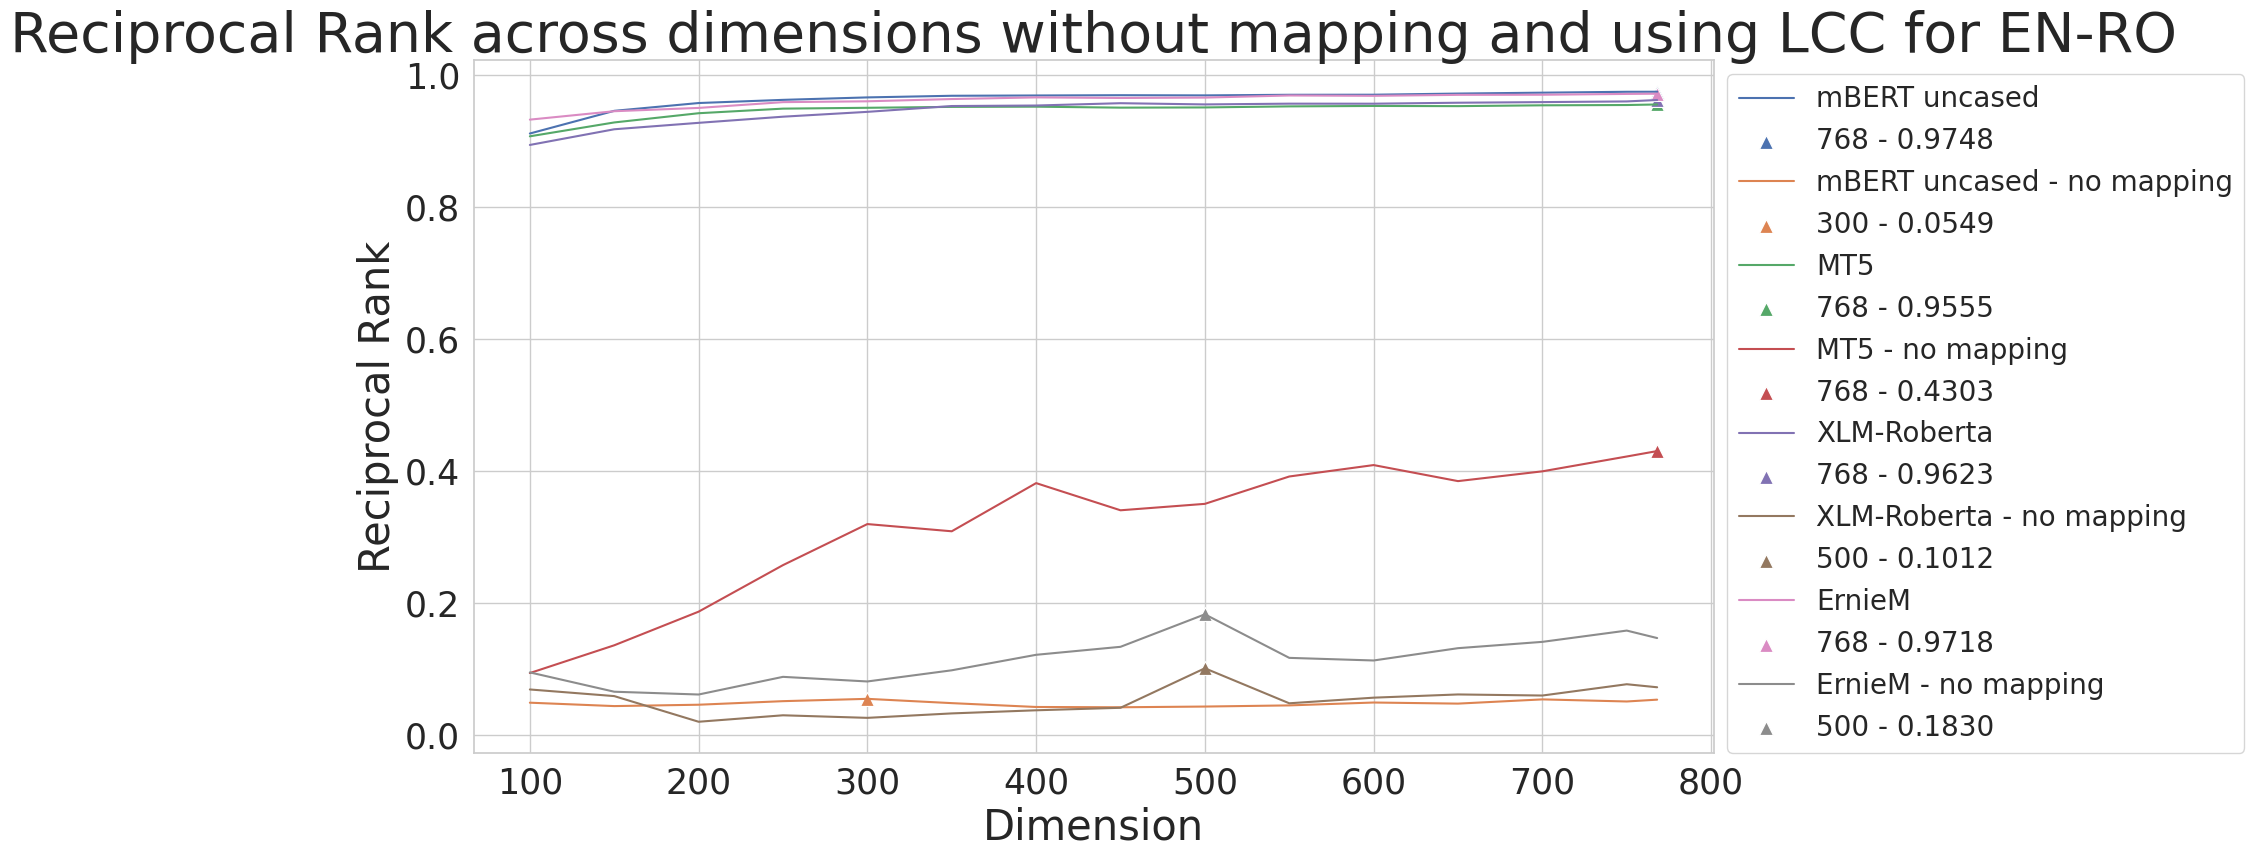

SL data shape: torch.Size([6487, 768]) | TL data shape: torch.Size([6487, 768])
Model: bert-base-multilingual-uncased | Training data shape: torch.Size([3750, 768]) | Testing data shape: torch.Size([1250, 768])
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 500)               50500     
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                

In [ ]:
import os
import json
import time

!mkdir Thesis/Plots
!mkdir Thesis/Results

with torch.no_grad():
    for evaluation_function in evaluation_functions:
        start_time = time.time()
        
        !mkdir Thesis/Plots/$evaluation_function.__name__
        !mkdir Thesis/Results/$evaluation_function.__name__
        
        for (sl, tl) in language_pairs:
            language_pair_score = {}
            language_pair = f"{sl}-{tl}"
            
            path = f"Thesis/Plots/{evaluation_function.__name__}/{language_pair}/"
            !mkdir $path
            
            if f"{language_pair}.json" in os.listdir(f"Thesis/Results/{evaluation_function.__name__}"):
                print(f"{language_pair} already present - moving to next language pair")
                continue

            mapping_scores = {}
            for mapping in mappings:
                score_pair = {}
                for model in models:
                    mate_scores = evaluate_method(sl, tl, model, size, mapping, dims, evaluation_function)
                    score_pair[model] = mate_scores
                plot_mate_scores(sl, tl, [value for key, value in score_pair.items()], models, dims, mapping.__name__, path, evaluation_function.__name__)
                mapping_scores[mapping.__name__] = score_pair
                
            print(torch.cuda.memory_summary())            

            print(f"It took {time.time() - start_time}s to process the data for {language_pair}")
            with open(f"./Thesis/Results/{evaluation_function.__name__}/{language_pair}.json", "w") as f:
                json.dump({language_pair: mapping_scores}, f)

In [6]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

In [ ]:
with open(f"./Thesis/data_{evaluation_function.__name__}.json", "r") as f:
    aux = json.load(f)
    print(aux)

In [ ]:
# def reciprocal_rank(l1_vecs, l2_vecs):
#     '''Mean reciprocal rank'''
#     l1_vecs, l2_vecs = l1_vecs.cpu().detach().numpy(), l2_vecs.cpu().detach().numpy()
#     sim = cosine_similarity(l1_vecs, l2_vecs)
    
#     return sum([1/rank(sim[i,i],sim[i]) for i in range(sim.shape[0])])/sim.shape[0]

In [ ]:
# ## example for cosine similarity

# import torch
# import numpy as np

sl_vec = np.load(PATH + "/" + f"en/" + f"emb_ernie-m-base_pytorch_en.npy",mmap_mode="r")
tl_vec = np.load(PATH + "/" + f"fr/" + f"emb_ernie-m-base_pytorch_fr.npy",mmap_mode="r")

sl_vec = torch.as_tensor(sl_vec).to(device)
tl_vec = torch.as_tensor(tl_vec).to(device)

sl_train, sl_test, tl_train, tl_test = train_test_split(sl_vec[:5000], tl_vec[:5000], test_size=0.25, random_state=42)

sl_train, sl_test, tl_train, tl_test = sl_train[:,:750].T, sl_test[:,:750].T, tl_train[:,:750].T, tl_test[:,:750].T

lc = torch.matmul(torch.linalg.pinv(tl_train.T),sl_train.T)
lin_m = lambda x: torch.matmul(lc.T, x)
l = lin_m(tl_test)

print(sl_vec.shape, sl_vec.T.shape)
print(sl_test.shape, sl_test.T.shape )

print(reciprocal_rank(sl_test.T, l.T))
print(reciprocal_rank(sl_vec[:,:750], tl_vec[:,:750]))

# cos = torch.nn.CosineSimilarity(dim=1) # 0 - row wise; 1 - column wise - can use 1 if vectors are transposed 


# print(sl_test.shape)
# print(torch.mean(cos(sl_test.T,l.T)))
# print(torch.mean(cos(sl_vec.T,tl_vec.T))) # MR as well

# print(mate_retrieval(sl_vec.T, tl_vec.T))
# print(mate_retrieval(sl_test.T, l.T))

In [ ]:
### code to be reused later maybe


# def evaluate_method_doc2vec(sl, tl, model_name, size, method, dims):
#     scores = []
#     for d in dims:
#         train_vec = pd.read_pickle(PATH + "/" + "doc2vec/" + f"emb_{model_name}_train_{d}.pickle")
#         test_vec = pd.read_pickle(PATH + "/" + "doc2vec/" + f"emb_{model_name}_test_{d}.pickle")
#         val_vec = pd.read_pickle(PATH + "/" + "doc2vec/" + f"emb_{model_name}_val_{d}.pickle")

#         sl_train, sl_test = np.asarray(test_vec["en_test_vecs"][:].tolist()), np.asarray(val_vec["en_val_vecs"][:].tolist())
#         tl_train, tl_test = np.asarray(test_vec["fr_test_vecs"][:].tolist()), np.asarray(val_vec["fr_val_vecs"][:].tolist())

#         sl_train, sl_test = torch.tensor(sl_train).to(device), torch.tensor(sl_test).to(device)
#         tl_train, tl_test = torch.tensor(tl_train).to(device), torch.tensor(tl_test).to(device)

#         print(f"Training data shape: {np.shape(sl_train)} | Testing data shape: {np.shape(sl_test)}")

#         score = None
#         if method == nnca:
#             score = method(sl_train, sl_test, tl_train, tl_test, [d], settings) # list(range(1,d))
#         else:
#             score = method(sl_train, sl_test, tl_train, tl_test, [d]) # [d]
   
#         scores.append(score[0])
                
#     return scores

# from sklearn.preprocessing import normalize

# def mate_retrieval_pr(l1_vecs, l2_vecs):
#     sim = np.dot(normalize(l1_vecs),normalize(l2_vecs).T)
#     '''Mate retrieval rate - the rate when the most symmetric document is ones translation.'''
#     TP, TN, FP, FN = 0, 0, 0, 0
#     for i in range(sim.shape[0]):
#       if sim[i].argmax()==i:
#         TP += 1
#         TN += (sim.shape[0]-1)
#       else:
#         FP += 1
#         FN += 1

#     p = TP/(TP+FP)
#     r = TP/(TP+FN)

#     print(f"precission={p} - recall={r}")
#     return sum([sim[i].argmax()==i for i in range(sim.shape[0])])/sim.shape[0]

# from sklearn.manifold import TSNE

# def plot_embeddings(sl, tl, sl_test, tl_test, best_map):
#   ts = TSNE(n_components=2, perplexity=5)

#   sl_ts = ts.fit_transform(sl_test)
#   tl_ts = ts.fit_transform(tl_test)

#   lc_tl_ts = ts.fit_transform(best_map[0].T)
#   lc_sl_ts = ts.fit_transform(best_map[1].T)

#   plt.scatter(sl_ts[:,0], sl_ts[:,1], label=f"{sl}") 
#   plt.scatter(lc_sl_ts[:,0], lc_sl_ts[:,1], label=f"{sl}-lca") # e.g. fr -> en

#   plt.scatter(tl_ts[:,0], tl_ts[:,1], label=f"{tl}")
#   plt.scatter(lc_tl_ts[:,0], lc_tl_ts[:,1], label=f"{tl}-lca")  # e.g. en -> fr

#   plt.legend()
#   plt.show()

# from sklearn import linear_model
# from sklearn.decomposition import PCA, TruncatedSVD
# from tqdm import tqdm